# Plan of Action


1.   Load **IMDb Movie Reviews dataset (50,000 reviews)**
2.   **Pre-process dataset** by removing special characters, numbers, emojis, spell check, html tags etc. from user reviews + convert **sentiment labels** positive & negative to numbers 1 & 0, respectively
3. Preparing the dataset for **Bag of Words(BOW) and TF-IDF** and using **Linear Regression Model, SVM Model and Naive Bayes Model**
4.   **Import GloVe Word Embedding** to build Embedding Dictionary + Use this to build Embedding Matrix for our Corpus
5. Model Training using **Deep Learning in Keras** for separate: **Simple Neural Net, CNN and LSTM Models** and analyse model performance and results
6. Along with these Models performing the Deep Learning with **Hybrid Models** such as **BI-LSTM, CNN-LSTM, CNN-BI LSTM and HYBRID NEURAL NETWORK(HNN)**
7. Last, perform **predictions on real IMDb movie reviews**

# Setting the environment

In [1]:
# # Mounting google drive

# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# # Setting toolkit folder as working directory

# %cd /content/drive/My Drive/Project8_SentimentAnalysis_with_NeuralNetwork
# ! ls

In [1]:
!pip install tensorflow

In [1]:
# Importing essential libraries and functions

import pandas as pd
import numpy as np
import re
import nltk
import pickle
from nltk.corpus import stopwords
from numpy import array
import tensorflow as tf
import matplotlib.pyplot as plt
import random

In [2]:
from keras.preprocessing.text import one_hot, Tokenizer
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, GlobalMaxPooling1D, Embedding, Conv1D, LSTM,Bidirectional
from sklearn.model_selection import train_test_split

In [3]:
from keras_preprocessing.sequence import pad_sequences

# Loading dataset

In [4]:
# Importing IMDb Movie Reviews dataset

movie_reviews = pd.read_csv("a1_IMDB_Dataset.csv")

# dataset source: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

In [5]:
# Dataset exploration

movie_reviews.shape

(50000, 2)

In [6]:
movie_reviews.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [7]:
# Checking for missing values

movie_reviews.isnull().values.any()

False

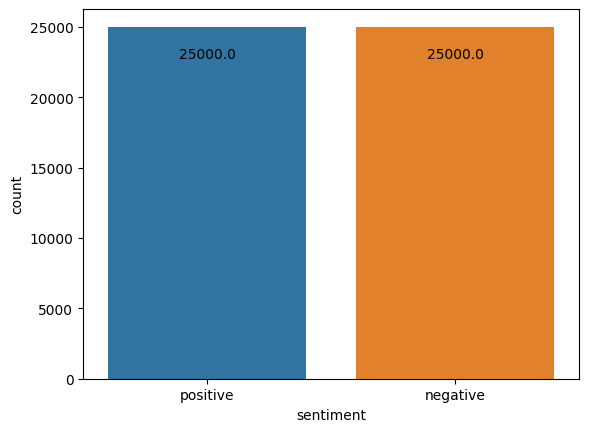

In [8]:
# Let's observe distribution of positive / negative sentiments in dataset

import seaborn as sns
import matplotlib.pyplot as plt
ax=sns.countplot(x='sentiment', data=movie_reviews)
for p in ax.patches:
    ax.annotate(format(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, -20), 
                textcoords = 'offset points')

Positive review:  Ali G earned his fame on the small screen - though the big screen has not lost him any kudos either. Ali G Indahouse is a hilarious laugh-a-second fun fest - just like on the small screen. He has lost none of his character or stupidity at all, and behind all that - none of the film is brainless fluff either. A human side to Ali is revealed during the film, the idea of Ali G running for PM is a brilliant, fresh and funny one - and the incessant stupidity of Staines' gangster man is mixed well with the stern, harsh world that is politics. The film is also full of brilliant new characters - and instead of just interview after interview, we get a proper comedy film that never gets repetitive or boring. So why didn't I give it ten stars? Well, the ending was funny, but also botched and failed - none of it made sense. And in parts, the film became offensive in trying to be funny - but that's Ali G for you - if it isn't offensive, it isn't itself, and it is totally and utter

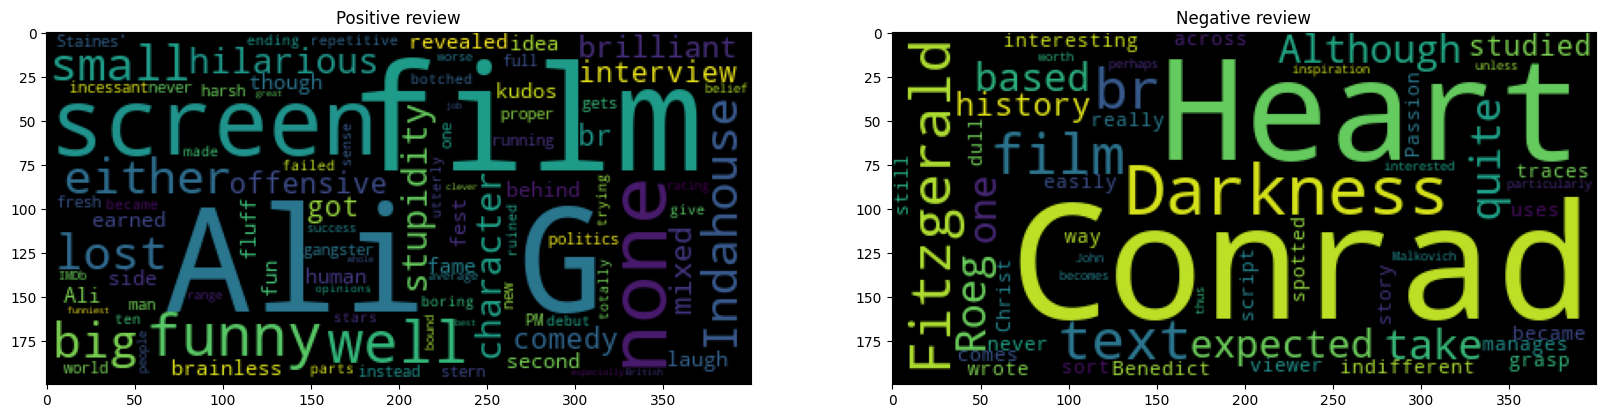

In [9]:
# Choose randomly a positive review and a negative review
ind_positive = random.choice(list(movie_reviews[movie_reviews['sentiment'] == 'positive'].index))
ind_negative = random.choice(list(movie_reviews[movie_reviews['sentiment'] == 'negative'].index))

review_positive = movie_reviews['review'][ind_positive]
review_negative = movie_reviews['review'][ind_negative]

print('Positive review: ', review_positive)
print('\n')
print('Negative review: ', review_negative)
print('\n')

from wordcloud import WordCloud
cloud_positive = WordCloud().generate(review_positive)
cloud_negative = WordCloud().generate(review_negative)

plt.figure(figsize = (20,15))
plt.subplot(1,2,1)
plt.imshow(cloud_positive)
plt.title('Positive review')

plt.subplot(1,2,2)
plt.imshow(cloud_negative)
plt.title('Negative review')
plt.show()

# Data Preprocessing
1.  Translating into English
1.  Removing URL
2.  Removing HTML tags
3.  Converting Chat Words eg.ICU, IDK, ASAP etc.
4.  Converting Abbreviations
5.  Removing special Characters
6.  Removing Emojis
7.  Removing Emoticons
8.  Removing Punctuations
9.  Removing extra characters and multiple spaces
10. Lowering down the characters
11. Removing Stopwords
12. Stemming
13. Lemmetization
14. Spell Check

In [10]:
movie_reviews["review"][2]

# You can see that our text contains punctuations, brackets, HTML tags and numbers 
# We will preprocess this text in the next section

'I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I\'d laughed at one of Woody\'s comedies in years (dare I say a decade?). While I\'ve never been impressed with Scarlet Johanson, in this she managed to tone down her "sexy" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than "Devil Wears Prada" and more interesting than "Superman" a great comedy to go see with friends.'

In [11]:
# import b2_preprocessing_function
from b2_preprocessing_function import CustomPreprocess
# import translator
from translator import translate

In [12]:
custom = CustomPreprocess()
custom.preprocess_text("Those were the best days of my life!")

'best days life '

In [13]:
convert = translate()
convert.conversion("नमस्ते")

'Greetings!'

In [14]:
convert.conversion("amaaazingg rod car")

'amaaazingg rod car'

In [15]:
# import nltk
# nltk.download('stopwords')

In [16]:
from googletrans import Translator,constants

In [17]:
def conversion(sen):
        
        translator = Translator()
        detection = translator.detect(sen)
        
        if (constants.LANGUAGES[detection.lang]=='english'):
            return sen
        else:
            translations = translator.translate(sen)
            sen = translations.text
            return sen

In [18]:
# Removing chat words

chat_words_str = """
AFAIK=As Far As I Know
AFK=Away From Keyboard
ASAP=As Soon As Possible
ATK=At The Keyboard
ATM=At The Moment
A3=Anytime, Anywhere, Anyplace
BAK=Back At Keyboard
BBL=Be Back Later
BBS=Be Back Soon
BFN=Bye For Now
B4N=Bye For Now
BRB=Be Right Back
BRT=Be Right There
BTW=By The Way
B4=Before
B4N=Bye For Now
CU=See You
CUL8R=See You Later
CYA=See You
FAQ=Frequently Asked Questions
FC=Fingers Crossed
FWIW=For What It's Worth
FYI=For Your Information
GAL=Get A Life
GG=Good Game
GN=Good Night
GMTA=Great Minds Think Alike
GR8=Great!
G9=Genius
IC=I See
ICQ=I Seek you (also a chat program)
ILU=ILU: I Love You
IMHO=In My Honest/Humble Opinion
IMO=In My Opinion
IOW=In Other Words
IRL=In Real Life
KISS=Keep It Simple, Stupid
LDR=Long Distance Relationship
LMAO=Laugh My A.. Off
LOL=Laughing Out Loud
LTNS=Long Time No See
L8R=Later
MTE=My Thoughts Exactly
M8=Mate
NRN=No Reply Necessary
OIC=Oh I See
PITA=Pain In The A..
PRT=Party
PRW=Parents Are Watching
ROFL=Rolling On The Floor Laughing
ROFLOL=Rolling On The Floor Laughing Out Loud
ROTFLMAO=Rolling On The Floor Laughing My A.. Off
SK8=Skate
STATS=Your sex and age
ASL=Age, Sex, Location
THX=Thank You
TTFN=Ta-Ta For Now!
TTYL=Talk To You Later
U=You
U2=You Too
U4E=Yours For Ever
WB=Welcome Back
WTF=What The F...
WTG=Way To Go!
WUF=Where Are You From?
W8=Wait...
7K=Sick:-D Laugher
"""
chat_words_list = []
chat_words_map_dict = {}
for line in chat_words_str.split("\n"):
    if line != "":
        cw = line.split("=")[0]
        cw_expanded = line.split("=")[1]
        chat_words_list.append(cw)
        chat_words_map_dict[cw] = cw_expanded
chat_words_list = set(chat_words_list)


def chat_words_conversion(text):
    new_text = []
    for w in text.split():
        if w.upper() in chat_words_list:
            new_text.append(chat_words_map_dict[w.upper()])
        else:
            new_text.append(w)
    return " ".join(new_text)

In [19]:
## In this case, we will be replacing some abbreviated pronouns with full forms (example:"you've"->you have")
abbreviations = {
    u"he's": "he is", 
    u"there's": "there is", 
    u"We're": "We are", 
    u"That's": "That is", 
    u"won't": "will not", 
    u"they're": "they are", 
    u"Can't": "Cannot", 
    u"wasn't": "was not", 
    u"don\x89Ûªt": "do not", 
    u"aren't": "are not", 
    u"isn't": "is not", 
    u"What's": "What is", 
    u"haven't": "have not", 
    u"hasn't": "has not", 
    u"There's": "There is", 
    u"He's": "He is", 
    u"It's": "It is", 
    u"You're": "You are", 
    u"I'M": "I am", 
    u"shouldn't": "should not", 
    u"wouldn't": "would not", 
    u"i'm": "I am", 
    u"I\x89Ûªm": "I am", 
    u"I'm": "I am", 
    u"Isn't": "is not", 
    u"Here's": "Here is", 
    u"you've": "you have", 
    u"you\x89Ûªve": "you have", 
    u"we're": "we are", 
    u"what's": "what is", 
    u"couldn't": "could not", 
    u"we've": "we have", 
    u"it\x89Ûªs": "it is", 
    u"doesn\x89Ûªt": "does not", 
    u"It\x89Ûªs": "It is", 
    u"Here\x89Ûªs": "Here is", 
    u"who's": "who is", 
    u"I\x89Ûªve": "I have", 
    u"y'all": "you all", 
    u"can\x89Ûªt": "cannot", 
    u"would've": "would have", 
    u"it'll": "it will", 
    u"we'll": "we will", 
    u"wouldn\x89Ûªt": "would not", 
    u"We've": "We have", 
    u"he'll": "he will", 
    u"Y'all": "You all", 
    u"Weren't": "Were not", 
    u"Didn't": "Did not", 
    u"they'll": "they will", 
    u"they'd": "they would", 
    u"DON'T": "DO NOT", 
    u"That\x89Ûªs": "That is", 
    u"they've": "they have", 
    u"i'd": "I would", 
    u"should've": "should have", 
    u"You\x89Ûªre": "You are", 
    u"where's": "where is", 
    u"Don\x89Ûªt": "Do not", 
    u"we'd": "we would", 
    u"i'll": "I will", 
    u"weren't": "were not", 
    u"They're": "They are", 
    u"Can\x89Ûªt": "Cannot", 
    u"you\x89Ûªll": "you will", 
    u"I\x89Ûªd": "I would", 
    u"let's": "let us", 
    u"it's": "it is", 
    u"can't": "cannot", 
    u"don't": "do not", 
    u"you're": "you are", 
    u"i've": "I have", 
    u"that's": "that is", 
    u"i'll": "I will", 
    u"doesn't": "does not",
    u"i'd": "I would", 
    u"didn't": "did not", 
    u"ain't": "am not", 
    u"you'll": "you will", 
    u"I've": "I have", 
    u"Don't": "do not", 
    u"I'll": "I will", 
    u"I'd": "I would", 
    u"Let's": "Let us", 
    u"you'd": "You would", 
    u"It's": "It is", 
    u"Ain't": "am not", 
    u"Haven't": "Have not", 
    u"Could've": "Could have", 
    u"youve": "you have",   
    u"donå«t": "do not", 
}
 
def convert_abb(text):
    for emot in abbreviations:
        text = re.sub(u'('+emot+')', "_".join(abbreviations[emot].replace(",","").split()), text)
    return text

In [20]:
# Spell Check
from textblob import TextBlob
def spell_check(text):
    textBlb = TextBlob(text)
    return textBlb.correct().string

In [21]:
# Removing emotions

EMOTICONS = {
    u":‑\)":"Happy face or smiley",
    u":\)":"Happy face or smiley",
    u":-\]":"Happy face or smiley",
    u":\]":"Happy face or smiley",
    u":-3":"Happy face smiley",
    u":3":"Happy face smiley",
    u":->":"Happy face smiley",
    u":>":"Happy face smiley",
    u"8-\)":"Happy face smiley",
    u":o\)":"Happy face smiley",
    u":-\}":"Happy face smiley",
    u":\}":"Happy face smiley",
    u":-\)":"Happy face smiley",
    u":c\)":"Happy face smiley",
    u":\^\)":"Happy face smiley",
    u"=\]":"Happy face smiley",
    u"=\)":"Happy face smiley",
    u":‑D":"Laughing, big grin or laugh with glasses",
    u":D":"Laughing, big grin or laugh with glasses",
    u"8‑D":"Laughing, big grin or laugh with glasses",
    u"8D":"Laughing, big grin or laugh with glasses",
    u"X‑D":"Laughing, big grin or laugh with glasses",
    u"XD":"Laughing, big grin or laugh with glasses",
    u"=D":"Laughing, big grin or laugh with glasses",
    u"=3":"Laughing, big grin or laugh with glasses",
    u"B\^D":"Laughing, big grin or laugh with glasses",
    u":-\)\)":"Very happy",
    u":‑\(":"Frown, sad, andry or pouting",
    u":-\(":"Frown, sad, andry or pouting",
    u":\(":"Frown, sad, andry or pouting",
    u":‑c":"Frown, sad, andry or pouting",
    u":c":"Frown, sad, andry or pouting",
    u":‑<":"Frown, sad, andry or pouting",
    u":<":"Frown, sad, andry or pouting",
    u":‑\[":"Frown, sad, andry or pouting",
    u":\[":"Frown, sad, andry or pouting",
    u":-\|\|":"Frown, sad, andry or pouting",
    u">:\[":"Frown, sad, andry or pouting",
    u":\{":"Frown, sad, andry or pouting",
    u":@":"Frown, sad, andry or pouting",
    u">:\(":"Frown, sad, andry or pouting",
    u":'‑\(":"Crying",
    u":'\(":"Crying",
    u":'‑\)":"Tears of happiness",
    u":'\)":"Tears of happiness",
    u"D‑':":"Horror",
    u"D:<":"Disgust",
    u"D:":"Sadness",
    u"D8":"Great dismay",
    u"D;":"Great dismay",
    u"D=":"Great dismay",
    u"DX":"Great dismay",
    u":‑O":"Surprise",
    u":O":"Surprise",
    u":‑o":"Surprise",
    u":o":"Surprise",
    u":-0":"Shock",
    u"8‑0":"Yawn",
    u">:O":"Yawn",
    u":-\*":"Kiss",
    u":\*":"Kiss",
    u":X":"Kiss",
    u";‑\)":"Wink or smirk",
    u";\)":"Wink or smirk",
    u"\*-\)":"Wink or smirk",
    u"\*\)":"Wink or smirk",
    u";‑\]":"Wink or smirk",
    u";\]":"Wink or smirk",
    u";\^\)":"Wink or smirk",
    u":‑,":"Wink or smirk",
    u";D":"Wink or smirk",
    u":‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"X‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"XP":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"d:":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"=p":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u">:P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":-[.]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":S":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":‑\|":"Straight face",
    u":\|":"Straight face",
    u":$":"Embarrassed or blushing",
    u":‑x":"Sealed lips or wearing braces or tongue-tied",
    u":x":"Sealed lips or wearing braces or tongue-tied",
    u":‑#":"Sealed lips or wearing braces or tongue-tied",
    u":#":"Sealed lips or wearing braces or tongue-tied",
    u":‑&":"Sealed lips or wearing braces or tongue-tied",
    u":&":"Sealed lips or wearing braces or tongue-tied",
    u"O:‑\)":"Angel, saint or innocent",
    u"O:\)":"Angel, saint or innocent",
    u"0:‑3":"Angel, saint or innocent",
    u"0:3":"Angel, saint or innocent",
    u"0:‑\)":"Angel, saint or innocent",
    u"0:\)":"Angel, saint or innocent",
    u":‑b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"0;\^\)":"Angel, saint or innocent",
    u">:‑\)":"Evil or devilish",
    u">:\)":"Evil or devilish",
    u"\}:‑\)":"Evil or devilish",
    u"\}:\)":"Evil or devilish",
    u"3:‑\)":"Evil or devilish",
    u"3:\)":"Evil or devilish",
    u">;\)":"Evil or devilish",
    u"\|;‑\)":"Cool",
    u"\|‑O":"Bored",
    u":‑J":"Tongue-in-cheek",
    u"#‑\)":"Party all night",
    u"%‑\)":"Drunk or confused",
    u"%\)":"Drunk or confused",
    u":-###..":"Being sick",
    u":###..":"Being sick",
    u"<:‑\|":"Dump",
    u"\(>_<\)":"Troubled",
    u"\(>_<\)>":"Troubled",
    u"\(';'\)":"Baby",
    u"\(\^\^>``":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(\^_\^;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(~_~;\) \(・\.・;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-\)zzz":"Sleeping",
    u"\(\^_-\)":"Wink",
    u"\(\(\+_\+\)\)":"Confused",
    u"\(\+o\+\)":"Confused",
    u"\(o\|o\)":"Ultraman",
    u"\^_\^":"Joyful",
    u"\(\^_\^\)/":"Joyful",
    u"\(\^O\^\)／":"Joyful",
    u"\(\^o\^\)／":"Joyful",
    u"\(__\)":"Kowtow as a sign of respect, or dogeza for apology",
    u"_\(\._\.\)_":"Kowtow as a sign of respect, or dogeza for apology",
    u"<\(_ _\)>":"Kowtow as a sign of respect, or dogeza for apology",
    u"<m\(__\)m>":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(__\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(_ _\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"\('_'\)":"Sad or Crying",
    u"\(/_;\)":"Sad or Crying",
    u"\(T_T\) \(;_;\)":"Sad or Crying",
    u"\(;_;":"Sad of Crying",
    u"\(;_:\)":"Sad or Crying",
    u"\(;O;\)":"Sad or Crying",
    u"\(:_;\)":"Sad or Crying",
    u"\(ToT\)":"Sad or Crying",
    u";_;":"Sad or Crying",
    u";-;":"Sad or Crying",
    u";n;":"Sad or Crying",
    u";;":"Sad or Crying",
    u"Q\.Q":"Sad or Crying",
    u"T\.T":"Sad or Crying",
    u"QQ":"Sad or Crying",
    u"Q_Q":"Sad or Crying",
    u"\(-\.-\)":"Shame",
    u"\(-_-\)":"Shame",
    u"\(一一\)":"Shame",
    u"\(；一_一\)":"Shame",
    u"\(=_=\)":"Tired",
    u"\(=\^\·\^=\)":"cat",
    u"\(=\^\·\·\^=\)":"cat",
    u"=_\^=	":"cat",
    u"\(\.\.\)":"Looking down",
    u"\(\._\.\)":"Looking down",
    u"\^m\^":"Giggling with hand covering mouth",
    u"\(\・\・?":"Confusion",
    u"\(?_?\)":"Confusion",
    u">\^_\^<":"Normal Laugh",
    u"<\^!\^>":"Normal Laugh",
    u"\^/\^":"Normal Laugh",
    u"\（\*\^_\^\*）" :"Normal Laugh",
    u"\(\^<\^\) \(\^\.\^\)":"Normal Laugh",
    u"\(^\^\)":"Normal Laugh",
    u"\(\^\.\^\)":"Normal Laugh",
    u"\(\^_\^\.\)":"Normal Laugh",
    u"\(\^_\^\)":"Normal Laugh",
    u"\(\^\^\)":"Normal Laugh",
    u"\(\^J\^\)":"Normal Laugh",
    u"\(\*\^\.\^\*\)":"Normal Laugh",
    u"\(\^—\^\）":"Normal Laugh",
    u"\(#\^\.\^#\)":"Normal Laugh",
    u"\（\^—\^\）":"Waving",
    u"\(;_;\)/~~~":"Waving",
    u"\(\^\.\^\)/~~~":"Waving",
    u"\(-_-\)/~~~ \($\·\·\)/~~~":"Waving",
    u"\(T_T\)/~~~":"Waving",
    u"\(ToT\)/~~~":"Waving",
    u"\(\*\^0\^\*\)":"Excited",
    u"\(\*_\*\)":"Amazed",
    u"\(\*_\*;":"Amazed",
    u"\(\+_\+\) \(@_@\)":"Amazed",
    u"\(\*\^\^\)v":"Laughing,Cheerful",
    u"\(\^_\^\)v":"Laughing,Cheerful",
    u"\(\(d[-_-]b\)\)":"Headphones,Listening to music",
    u'\(-"-\)':"Worried",
    u"\(ーー;\)":"Worried",
    u"\(\^0_0\^\)":"Eyeglasses",
    u"\(\＾ｖ\＾\)":"Happy",
    u"\(\＾ｕ\＾\)":"Happy",
    u"\(\^\)o\(\^\)":"Happy",
    u"\(\^O\^\)":"Happy",
    u"\(\^o\^\)":"Happy",
    u"\)\^o\^\(":"Happy",
    u":O o_O":"Surprised",
    u"o_0":"Surprised",
    u"o\.O":"Surpised",
    u"\(o\.o\)":"Surprised",
    u"oO":"Surprised",
    u"\(\*￣m￣\)":"Dissatisfied",
    u"\(‘A`\)":"Snubbed or Deflated"
}

def remove_emoticons(text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', text)

In [22]:
# Stemming

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
def stem_words(text):
    return " ".join([ps.stem(word) for word in text.split()])

In [23]:
# URL Removal

def remove_url(text):
    url_tag = re.compile(r'https://\S+|www\.\S+')
    text = url_tag.sub(r'', text)
    return text

In [24]:
# HTML Tags Removal

def remove_html(text):
    html_tag = re.compile(r'<.*?>')
    text = html_tag.sub(r'', text)
    return text

In [25]:
# Punctuation Removal

def remove_punctuation(text): 
    punct_tag = re.compile(r'[^\w\s]')
    text = punct_tag.sub(r'', text) 
    return text

In [26]:
# Special Character Removal

def remove_special_character(text):
    special_tag = re.compile(r'[^a-zA-Z0-9\s]')
    text = special_tag.sub(r'', text)
    return text

In [27]:
# Emojis Removal

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [28]:
# Preprocessing Function

from nltk.stem import WordNetLemmatizer
def clean_text(text):
    
    wordnet_lemmatizer = WordNetLemmatizer()
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"
    
    text = custom.preprocess_text(text)
    text = remove_url(text)
    text = remove_html(text)
    text = chat_words_conversion(text)
    text = convert_abb(text)
    text = remove_special_character(text)
    text = remove_emoji(text)
    text = remove_emoticons(text)
    text = remove_punctuation(text)
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = re.sub(sequencePattern, seqReplacePattern, text)
    text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text) # When we remove apostrophe from the word "Mark's", the apostrophe is replaced by an empty space. Hence, we are left with single character "s" that we are removing here.
    text = re.sub(r'\s+', ' ', text) # Next, we remove all the single characters and replace it by a space which creates multiple spaces in our text. Finally, we remove the multiple spaces from our text as well.
    text = text.lower()
    
    # Remove Stopwords
    pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
    text = pattern.sub('', text)
    
    text = stem_words(text)
    
    #Lemmetization
    sentence_words = nltk.word_tokenize(text)
    textwords = ''
    for word in sentence_words:
        name = wordnet_lemmatizer.lemmatize(word,pos='v')
        textwords += (name+' ')
    text = textwords
    
    text = spell_check(text)  
    
    return text

In [29]:
movie_reviews['processed'] = movie_reviews['review'].apply(lambda x: custom.preprocess_text(x))
movie_reviews.head(5)

,review,sentiment,processed
0,One of the other reviewers has mentioned that ...,positive,one reviewers mentioned watching oz episode ho...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically family little boy jake thinks zombie...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visually stunnin...


Positive review:  never kissed starring drew barymore reporter josie gellar sweet extremely sappy sometimes quite painful tale timid woman named josie gellar though brilliant quiet shy never kissed man assigned first major news story newspaper works go undercover high school student befriend popular cool kids get scoop really goes world high school problem josie never popular high school fact traumatizing experience recipient quite lot teasing cruel jokes josie grabs assignment much finally fit get scoop finds major premise story never kissed one movies sappy schmaltzy times particularly scenes end limits believability sorely tested many cynic may like movie however sweetly done drew barymore perfect bumbling yet lovely josie breathes breath fresh air character makes appear perfectly realistic also enjoyed leelee sobiesky intellectual student befriends josie first day school never kissed really funny moments josie unravels frantic efforts cool example reggae bar scene also loved appear

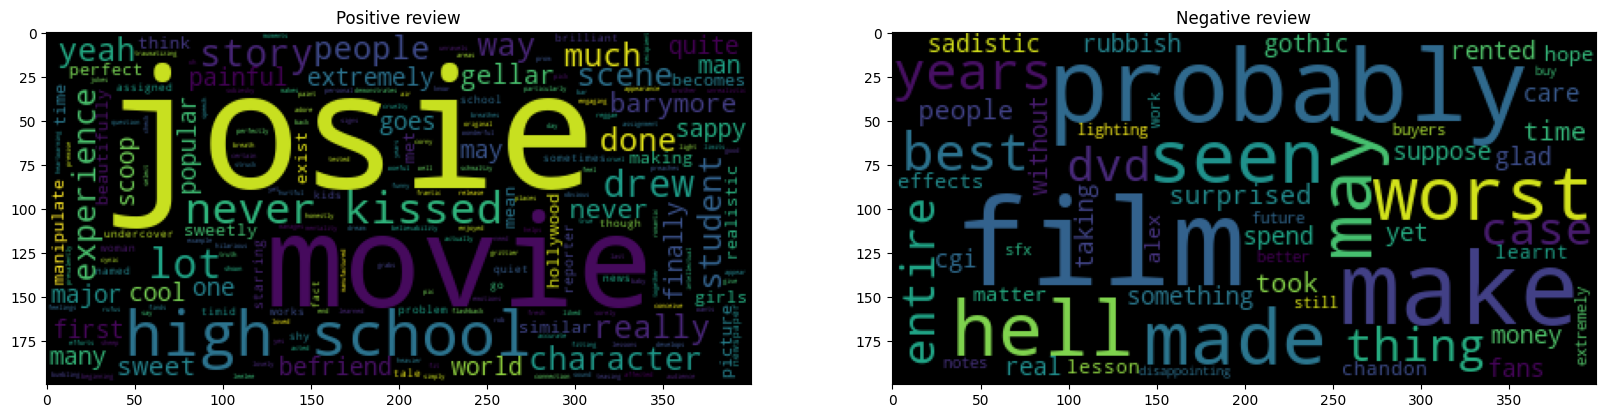

In [30]:
#Choose randomly a positive review and a negative review

ind_positive = random.choice(list(movie_reviews[movie_reviews['sentiment'] == 'positive'].index))
ind_negative = random.choice(list(movie_reviews[movie_reviews['sentiment'] == 'negative'].index))

review_positive = movie_reviews['processed'][ind_positive]
review_negative = movie_reviews['processed'][ind_negative]

print('Positive review: ', review_positive)
print('\n')
print('Negative review: ', review_negative)
print('\n')

from wordcloud import WordCloud
cloud_positive = WordCloud().generate(review_positive)
cloud_negative = WordCloud().generate(review_negative)

plt.figure(figsize = (20,15))
plt.subplot(1,2,1)
plt.imshow(cloud_positive)
plt.title('Positive review')

plt.subplot(1,2,2)
plt.imshow(cloud_negative)
plt.title('Negative review')
plt.show()

In [31]:
# Converting sentiment labels to 0 & 1

y = movie_reviews['sentiment']

y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

In [32]:
# Calling preprocessing_text function on movie_reviews

X = movie_reviews['processed']

In [33]:
# Sample cleaned up movie review 

X[2]

'thought wonderful way spend time hot summer weekend sitting air conditioned theater watching light hearted comedy plot simplistic dialogue witty characters likable even well bread suspected serial killer may disappointed realize match point risk addiction thought proof woody allen still fully control style many us grown love laughed one woody comedies years dare say decade never impressed scarlet johanson managed tone sexy image jumped right average spirited young woman may crown jewel career wittier devil wears prada interesting superman great comedy go see friends '

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# The train set will be used to train our deep learning models 
# while test set will be used to evaluate how well our model performs 

## Data preprocessing for BOW and TF-IDF

In [35]:
from nltk.tokenize.toktok import ToktokTokenizer
#Tokenization of text
tokenizer=ToktokTokenizer()

In [36]:
#tokenizing
def data_preprocess(text):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    filtered_text = ' '.join(tokens)    
    return filtered_text
#Apply function on review column
movie_reviews['processed']=movie_reviews['processed'].apply(data_preprocess)

In [37]:
#normalized train reviews
norm_train_reviews = movie_reviews.processed[:40000]
norm_train_reviews[0]

'one reviewers mentioned watching oz episode hooked right exactly happened first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home many aryans muslims gangstas latinos christians italians irish scuffles death stares dodgy dealings shady agreements never far away would say main appeal show due fact goes shows dare forget pretty pictures painted mainstream audiences forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards sold nickel inmates kill order get away well mannered middle class inmates turned prison bitches due lack street skill

In [38]:
#Normalized test reviews
norm_test_reviews=movie_reviews.processed[40000:]
norm_test_reviews[45005]

'read reviews watching piece cinematic garbage took least pages find somebody else think appallingly unfunny montage acme humour indeed era least funny set sketch comedy ever seen till comes along half skits already done infinitely better acts monty python woody allen say nice piece animation lasts seconds highlight film would still get close summing mindless drivel ridden waste minutes seminal comedy world seminal really mean semen scatological humour world scat actually feces precursor jokes mean handbook comedy tits bums odd beaver nice pubescent boy least one hand free found playboy exists give break early way sketch comedy going back least ten years prior way could even forgive film even made gunpoint retro hardly sketches clowns subtly perverting children may cutting edge circles could actually funny comes really quite sad kept going throughout entire minutes sheer belief may saved genuinely funny skit end gave film lower score recommend insomniacs coma patients perhaps people su

# Bags of words Model
It is used to convert **text documents** to **numerical vectors or bag of words.**

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
#Count vectorizer for bag of words
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
#transformed train reviews
cv_train_reviews=cv.fit_transform(norm_train_reviews)
#transformed test reviews
cv_test_reviews=cv.transform(norm_test_reviews)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)
#vocab=cv.get_feature_names()-toget feature names

BOW_cv_train: (40000, 6320620)
BOW_cv_test: (10000, 6320620)


# Term Frequency-Inverse Document Frequency Model (TFIDF)
It is used to convert **text documents** to matrix of **tfidf features**.

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
#Tfidf vectorizer
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
#transformed train reviews
tv_train_reviews=tv.fit_transform(norm_train_reviews)
#transformed test reviews
tv_test_reviews=tv.transform(norm_test_reviews)
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (40000, 6320620)
Tfidf_test: (10000, 6320620)


## Labeling the sentiment text

In [41]:
from sklearn.preprocessing import LabelBinarizer
#labeling the sentient data
lb=LabelBinarizer()
#transformed sentiment data
sentiment_data=lb.fit_transform(movie_reviews['sentiment'])
print(sentiment_data.shape)

(50000, 1)


In [42]:
#Spliting the sentiment data
train_sentiments=sentiment_data[:40000]
test_sentiments=sentiment_data[40000:]
print(train_sentiments)
print(test_sentiments)

[[1]
 [1]
 [1]
 ...
 [1]
 [0]
 [0]]
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [43]:
ml_data=[]

# Modelling the dataset using Machine Learning

## Linear Logistic Model
Let us build **Logistic Regression Model** for both **Bag of Words** and **TF-IDF** features

In [44]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [45]:
#training the model
lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
#Fitting the model for Bag of words
lr_bow=lr.fit(cv_train_reviews,train_sentiments)
print(lr_bow)
#Fitting the model for tfidf features
lr_tfidf=lr.fit(tv_train_reviews,train_sentiments)
print(lr_tfidf)

LogisticRegression(C=1, max_iter=500, random_state=42)
LogisticRegression(C=1, max_iter=500, random_state=42)


In [46]:
#Predicting the model for bag of words
lr_bow_predict=lr.predict(cv_test_reviews)
print(lr_bow_predict)
##Predicting the model for tfidf features
lr_tfidf_predict=lr.predict(tv_test_reviews)
print(lr_tfidf_predict)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [47]:
#Accuracy score for bag of words
lr_bow_score=accuracy_score(test_sentiments,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)
#Accuracy score for tfidf features
lr_tfidf_score=accuracy_score(test_sentiments,lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)

lr_bow_score : 0.7484
lr_tfidf_score : 0.7493


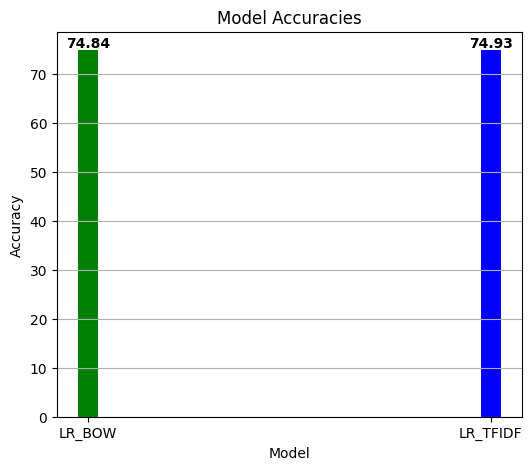

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
model_names=["LR_BOW","LR_TFIDF"]
model_acc = [round(lr_bow_score*100,2),round(lr_tfidf_score*100,2)]

# Create a bar chart
plt.close('all')
colors = ['green', 'blue']
plt.rcParams["figure.figsize"] = (6,5)
plt.bar(model_names, model_acc,color=colors,width=0.05)

# Add horizontal grid lines
plt.grid(True, axis='y')

# Add a title and axis labels
plt.title('Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')

# Rotate x-axis labels
# plt.xticks(rotation=45)

# Add value labels on top of each bar
for i, v in enumerate(model_acc):
    plt.text(i, v, str(v), ha='center', va='bottom', fontweight='bold')

# Display the chart
plt.show()

In [49]:
#Classification report for bag of words 
lr_bow_report=classification_report(test_sentiments,lr_bow_predict,target_names=['Positive','Negative'])
print(lr_bow_report)

#Classification report for tfidf features
lr_tfidf_report=classification_report(test_sentiments,lr_tfidf_predict,target_names=['Positive','Negative'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.75      0.75      0.75      4993
    Negative       0.75      0.75      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000

              precision    recall  f1-score   support

    Positive       0.74      0.77      0.75      4993
    Negative       0.76      0.73      0.74      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



In [50]:
import tensorflow as tf
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

y_pred = tf.argmax(lr_bow.predict(tv_test_reviews), axis=-1)
y_true = tf.argmax(test_sentiments, axis=-1)

# Obtain the predicted probabilities for each input instance
y_pred_prob = lr_bow.predict(tv_test_reviews)

# Apply a threshold to convert the probabilities to binary labels
y_pred = (y_pred_prob >= 0.5).astype(int)

# Calculate the f1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate the precision score
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate the recall score
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate the accuracy score
accuracy = round(lr_bow_score*100,2)


# Print the scores
print('F1 score: {:.4f}'.format(f1))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall Score: {:.2f}".format(recall))
print("Accuracy:", accuracy)


F1 score: 0.4981
Precision: 49.85%
Recall Score: 0.50
Accuracy: 74.84


In [51]:
ml_data.append(["LR_BOW", f1, precision, recall, accuracy])

In [52]:
import tensorflow as tf
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

y_pred = tf.argmax(lr_tfidf.predict(tv_test_reviews), axis=-1)
y_true = tf.argmax(test_sentiments, axis=-1)

# Obtain the predicted probabilities for each input instance
y_pred_prob = lr_tfidf.predict(tv_test_reviews)

# Apply a threshold to convert the probabilities to binary labels
y_pred = (y_pred_prob >= 0.5).astype(int)

# Calculate the f1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate the precision score
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate the recall score
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate the accuracy score
accuracy = round(lr_tfidf_score*100,2)


# Print the scores
print('F1 score: {:.4f}'.format(f1))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall Score: {:.2f}".format(recall))
print("Accuracy:", accuracy)


F1 score: 0.4981
Precision: 49.85%
Recall Score: 0.50
Accuracy: 74.93


In [53]:
ml_data.append(["LR_TFIDF", f1, precision, recall, accuracy])

<Figure size 500x500 with 0 Axes>

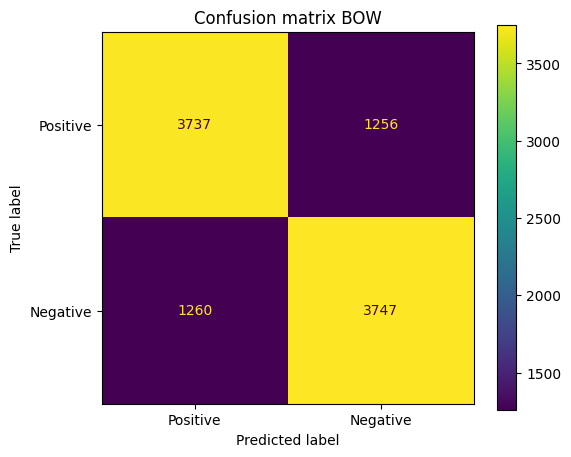

In [54]:
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score, ConfusionMatrixDisplay
cm_bow = ConfusionMatrixDisplay(confusion_matrix(test_sentiments,lr_bow_predict), display_labels = ['Positive','Negative'])
plt.figure(figsize = (5,5))
cm_bow.plot()
plt.title('Confusion matrix BOW')
plt.show()

<Figure size 500x500 with 0 Axes>

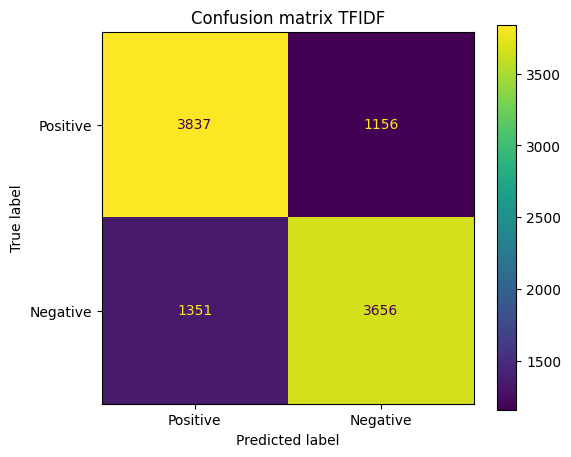

In [55]:
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score, ConfusionMatrixDisplay
cm_tfidf = ConfusionMatrixDisplay(confusion_matrix(test_sentiments,lr_tfidf_predict), display_labels = ['Positive','Negative'])
plt.figure(figsize = (5,5))
cm_tfidf.plot()
plt.title('Confusion matrix TFIDF')
plt.show()

## Stochastic Gradient Descent or Linear Support Vector Machines 
**SVM** for **Bag of Words** and **TF-IDF** features

In [56]:
#training the linear svm
svm=SGDClassifier(loss='hinge',max_iter=500,random_state=42)
#fitting the svm for bag of words
svm_bow=svm.fit(cv_train_reviews,train_sentiments)
print(svm_bow)
#fitting the svm for tfidf features
svm_tfidf=svm.fit(tv_train_reviews,train_sentiments)
print(svm_tfidf)

SGDClassifier(max_iter=500, random_state=42)
SGDClassifier(max_iter=500, random_state=42)


In [57]:
#Predicting the model for bag of words
svm_bow_predict=svm.predict(cv_test_reviews)
print(svm_bow_predict)
#Predicting the model for tfidf features
svm_tfidf_predict=svm.predict(tv_test_reviews)
print(svm_tfidf_predict)

[0 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]


In [58]:
#Accuracy score for bag of words
svm_bow_score=accuracy_score(test_sentiments,svm_bow_predict)
print("svm_bow_score :",svm_bow_score)
#Accuracy score for tfidf features
svm_tfidf_score=accuracy_score(test_sentiments,svm_tfidf_predict)
print("svm_tfidf_score :",svm_tfidf_score)

svm_bow_score : 0.5736
svm_tfidf_score : 0.5111


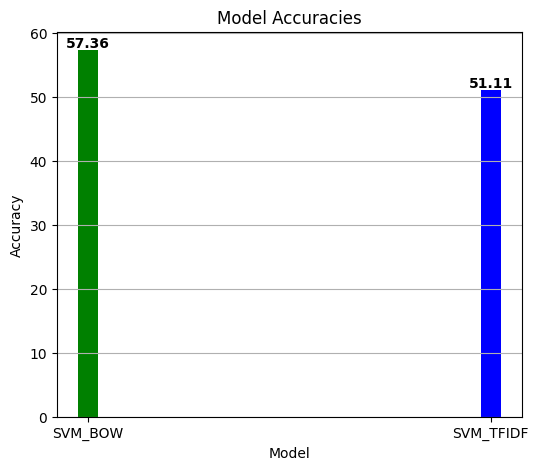

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
model_names=["SVM_BOW","SVM_TFIDF"]
model_acc = [round(svm_bow_score*100,2),round(svm_tfidf_score*100,2)]

# Create a bar chart
plt.close('all')
colors = ['green', 'blue']
plt.rcParams["figure.figsize"] = (6,5)
plt.bar(model_names, model_acc,color=colors,width=0.05)

# Add horizontal grid lines
plt.grid(True, axis='y')

# Add a title and axis labels
plt.title('Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')

# Rotate x-axis labels
# plt.xticks(rotation=45)

# Add value labels on top of each bar
for i, v in enumerate(model_acc):
    plt.text(i, v, str(v), ha='center', va='bottom', fontweight='bold')

# Display the chart
plt.show()

In [60]:
#Classification report for bag of words 
svm_bow_report=classification_report(test_sentiments,svm_bow_predict,target_names=['Positive','Negative'])
print(svm_bow_report)
#Classification report for tfidf features
svm_tfidf_report=classification_report(test_sentiments,svm_tfidf_predict,target_names=['Positive','Negative'])
print(svm_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.93      0.16      0.27      4993
    Negative       0.54      0.99      0.70      5007

    accuracy                           0.57     10000
   macro avg       0.73      0.57      0.48     10000
weighted avg       0.73      0.57      0.49     10000

              precision    recall  f1-score   support

    Positive       1.00      0.02      0.04      4993
    Negative       0.51      1.00      0.67      5007

    accuracy                           0.51     10000
   macro avg       0.75      0.51      0.36     10000
weighted avg       0.75      0.51      0.36     10000



In [61]:
import tensorflow as tf
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

y_pred = tf.argmax(svm_bow.predict(tv_test_reviews), axis=-1)
y_true = tf.argmax(test_sentiments, axis=-1)

# Obtain the predicted probabilities for each input instance
y_pred_prob = svm_bow.predict(tv_test_reviews)

# Apply a threshold to convert the probabilities to binary labels
y_pred = (y_pred_prob >= 0.5).astype(int)

# Calculate the f1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate the precision score
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate the recall score
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate the accuracy score
accuracy = round(svm_bow_score*100,2)


# Print the scores
print('F1 score: {:.4f}'.format(f1))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall Score: {:.2f}".format(recall))
print("Accuracy:", accuracy)


F1 score: 0.3470
Precision: 50.68%
Recall Score: 0.50
Accuracy: 57.36


In [62]:
ml_data.append(["SVM_BOW", f1, precision, recall, accuracy])

In [63]:
import tensorflow as tf
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

y_pred = tf.argmax(svm_tfidf.predict(tv_test_reviews), axis=-1)
y_true = tf.argmax(test_sentiments, axis=-1)

# Obtain the predicted probabilities for each input instance
y_pred_prob = svm_tfidf.predict(tv_test_reviews)

# Apply a threshold to convert the probabilities to binary labels
y_pred = (y_pred_prob >= 0.5).astype(int)

# Calculate the f1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate the precision score
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate the recall score
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate the accuracy score
accuracy = round(svm_tfidf_score*100,2)


# Print the scores
print('F1 score: {:.4f}'.format(f1))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall Score: {:.2f}".format(recall))
print("Accuracy:", accuracy)


F1 score: 0.3470
Precision: 50.68%
Recall Score: 0.50
Accuracy: 51.11


In [64]:
ml_data.append(["SVM_TFIDF", f1, precision, recall, accuracy])

<Figure size 500x500 with 0 Axes>

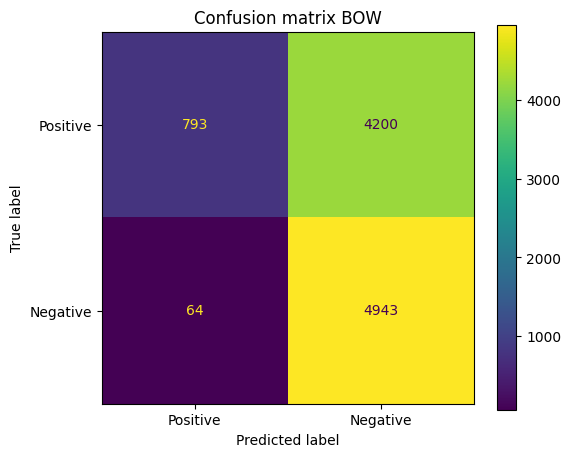

In [65]:
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score, ConfusionMatrixDisplay
cm_bow = ConfusionMatrixDisplay(confusion_matrix(test_sentiments,svm_bow_predict), display_labels = ['Positive','Negative'])
plt.figure(figsize = (5,5))
cm_bow.plot()
plt.title('Confusion matrix BOW')
plt.show()

<Figure size 500x500 with 0 Axes>

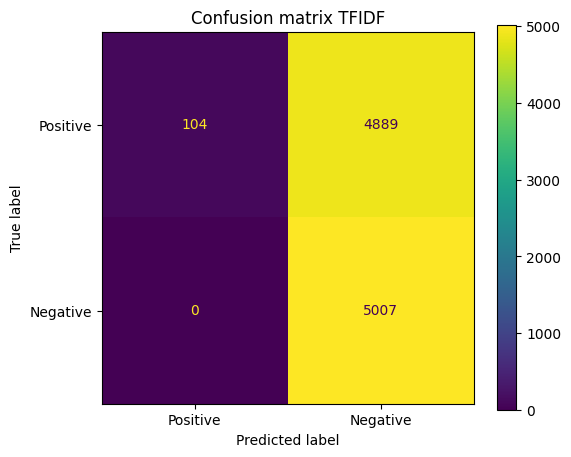

In [66]:
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score, ConfusionMatrixDisplay
cm_tfidf = ConfusionMatrixDisplay(confusion_matrix(test_sentiments,svm_tfidf_predict), display_labels = ['Positive','Negative'])
plt.figure(figsize = (5,5))
cm_tfidf.plot()
plt.title('Confusion matrix TFIDF')
plt.show()

## Multinomial Naive Bayes Model
**MultinominalNB** for **Bag of Words** and **TF-IDF** features

In [67]:
#training the model
mnb=MultinomialNB()
#fitting the svm for bag of words
mnb_bow=mnb.fit(cv_train_reviews,train_sentiments)
print(mnb_bow)
#fitting the svm for tfidf features
mnb_tfidf=mnb.fit(tv_train_reviews,train_sentiments)
print(mnb_tfidf)

MultinomialNB()
MultinomialNB()


In [68]:
#Predicting the model for bag of words
mnb_bow_predict=mnb.predict(cv_test_reviews)
print(mnb_bow_predict)
#Predicting the model for tfidf features
mnb_tfidf_predict=mnb.predict(tv_test_reviews)
print(mnb_tfidf_predict)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [69]:
#Accuracy score for bag of words
mnb_bow_score=accuracy_score(test_sentiments,mnb_bow_predict)
print("mnb_bow_score :",mnb_bow_score)
#Accuracy score for tfidf features
mnb_tfidf_score=accuracy_score(test_sentiments,mnb_tfidf_predict)
print("mnb_tfidf_score :",mnb_tfidf_score)

mnb_bow_score : 0.7493
mnb_tfidf_score : 0.7485


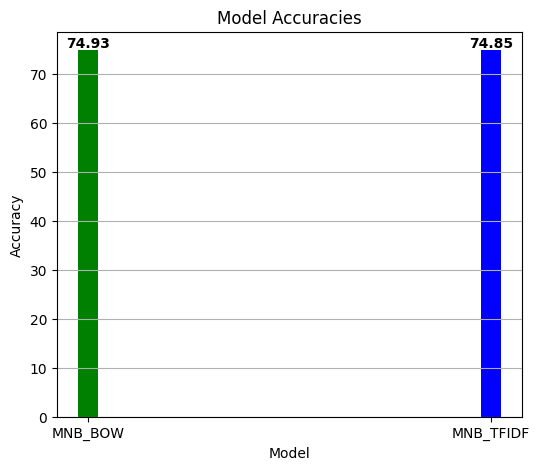

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
model_names=["MNB_BOW","MNB_TFIDF"]
model_acc = [round(mnb_bow_score*100,2),round(mnb_tfidf_score*100,2)]

# Create a bar chart
plt.close('all')
colors = ['green', 'blue']
plt.rcParams["figure.figsize"] = (6,5)
plt.bar(model_names, model_acc,color=colors,width=0.05)

# Add horizontal grid lines
plt.grid(True, axis='y')

# Add a title and axis labels
plt.title('Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')

# Rotate x-axis labels
# plt.xticks(rotation=45)

# Add value labels on top of each bar
for i, v in enumerate(model_acc):
    plt.text(i, v, str(v), ha='center', va='bottom', fontweight='bold')

# Display the chart
plt.show()

In [71]:
#Classification report for bag of words 
mnb_bow_report=classification_report(test_sentiments,mnb_bow_predict,target_names=['Positive','Negative'])
print(mnb_bow_report)
#Classification report for tfidf features
mnb_tfidf_report=classification_report(test_sentiments,mnb_tfidf_predict,target_names=['Positive','Negative'])
print(mnb_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.75      0.75      0.75      4993
    Negative       0.75      0.74      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000

              precision    recall  f1-score   support

    Positive       0.74      0.76      0.75      4993
    Negative       0.75      0.74      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



In [72]:
import tensorflow as tf
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

y_pred = tf.argmax(mnb_bow.predict(tv_test_reviews), axis=-1)
y_true = tf.argmax(test_sentiments, axis=-1)

# Obtain the predicted probabilities for each input instance
y_pred_prob = mnb_bow.predict(tv_test_reviews)

# Apply a threshold to convert the probabilities to binary labels
y_pred = (y_pred_prob >= 0.5).astype(int)

# Calculate the f1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate the precision score
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate the recall score
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate the accuracy score
accuracy = round(mnb_bow_score*100,2)


# Print the scores
print('F1 score: {:.4f}'.format(f1))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall Score: {:.2f}".format(recall))
print("Accuracy:", accuracy)


F1 score: 0.4985
Precision: 49.86%
Recall Score: 0.50
Accuracy: 74.93


In [73]:
ml_data.append(["MNB_BOW", f1, precision, recall, accuracy])

In [74]:
import tensorflow as tf
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

y_pred = tf.argmax(mnb_tfidf.predict(tv_test_reviews), axis=-1)
y_true = tf.argmax(test_sentiments, axis=-1)

# Obtain the predicted probabilities for each input instance
y_pred_prob = mnb_tfidf.predict(tv_test_reviews)

# Apply a threshold to convert the probabilities to binary labels
y_pred = (y_pred_prob >= 0.5).astype(int)

# Calculate the f1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate the precision score
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate the recall score
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate the accuracy score
accuracy = round(mnb_tfidf_score*100,2)


# Print the scores
print('F1 score: {:.4f}'.format(f1))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall Score: {:.2f}".format(recall))
print("Accuracy:", accuracy)


F1 score: 0.4985
Precision: 49.86%
Recall Score: 0.50
Accuracy: 74.85


In [75]:
ml_data.append(["MNB_TFIDF", f1, precision, recall, accuracy])

<Figure size 500x500 with 0 Axes>

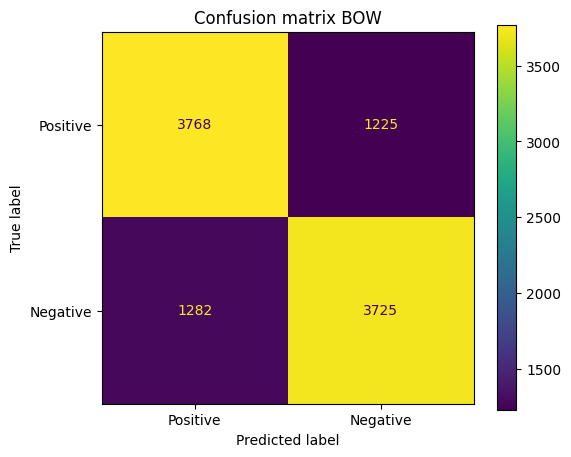

In [76]:
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score, ConfusionMatrixDisplay
cm_bow = ConfusionMatrixDisplay(confusion_matrix(test_sentiments,mnb_bow_predict), display_labels = ['Positive','Negative'])
plt.figure(figsize = (5,5))
cm_bow.plot()
plt.title('Confusion matrix BOW')
plt.show()

<Figure size 500x500 with 0 Axes>

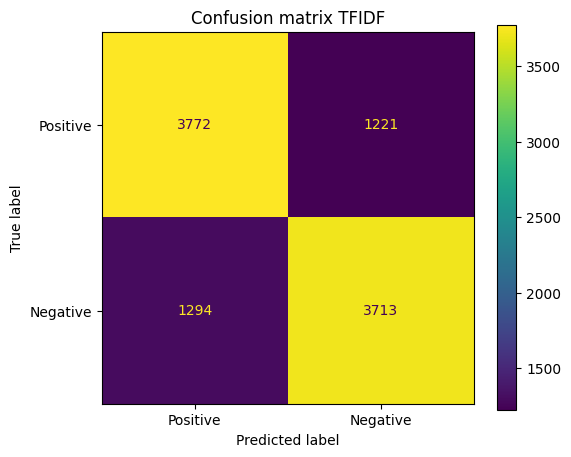

In [77]:
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score, ConfusionMatrixDisplay
cm_tfidf = ConfusionMatrixDisplay(confusion_matrix(test_sentiments,mnb_tfidf_predict), display_labels = ['Positive','Negative'])
plt.figure(figsize = (5,5))
cm_tfidf.plot()
plt.title('Confusion matrix TFIDF')
plt.show()

# COMPARISION

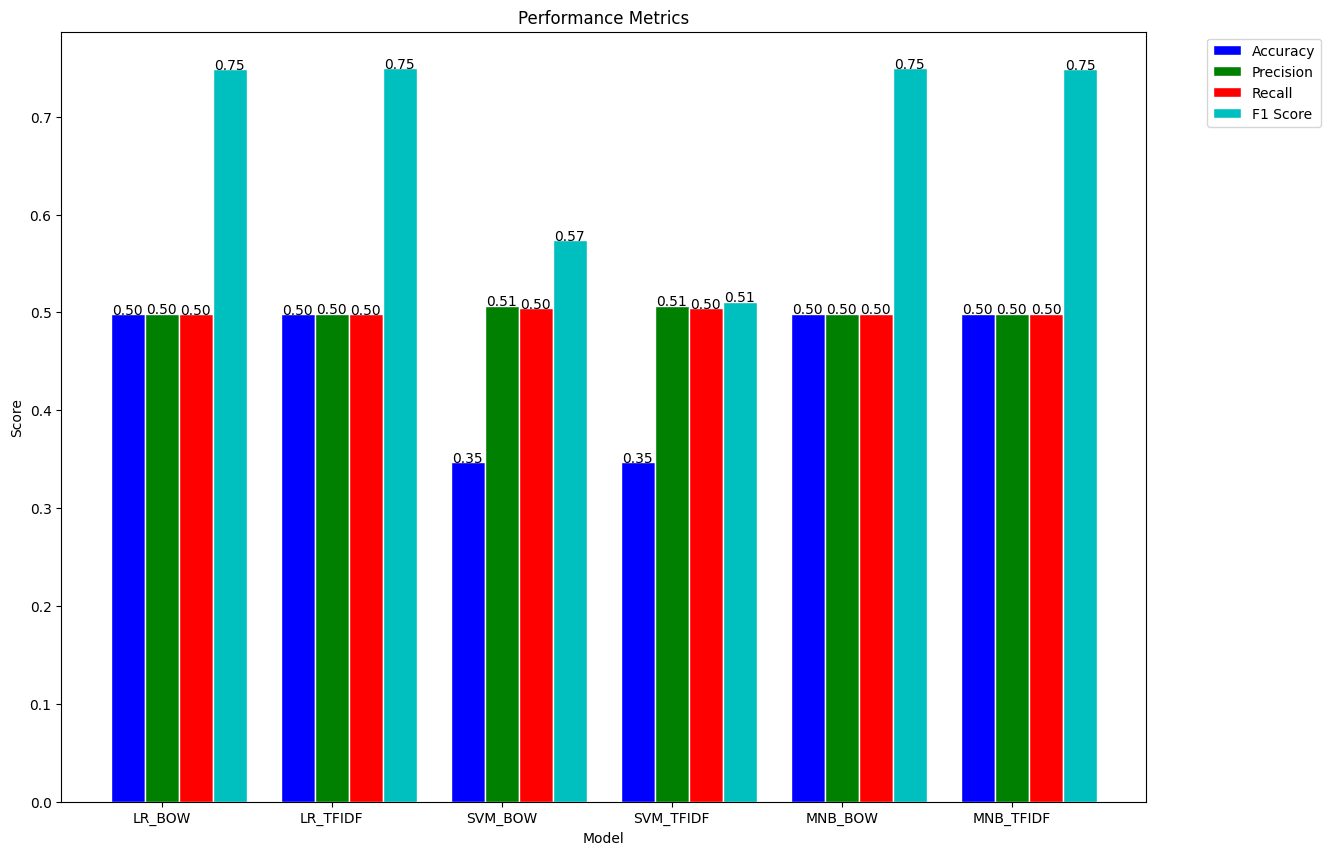

In [90]:
import numpy as np
import matplotlib.pyplot as plt

# extract the accuracy, precision, recall, and f1 values for each model
accuracy = [x[1] for x in ml_data]
precision = [x[2] for x in ml_data]
recall = [x[3] for x in ml_data]
f1 = [(x[4]/100) for x in ml_data]

# set the width of the bars
barWidth = 0.20

# set the positions of the bars on the x-axis
r1 = np.arange(len(ml_data))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# create the bar chart
plt.subplots(figsize=(14,10))
bar1=plt.bar(r1, accuracy, color='b', width=barWidth, edgecolor='white', label='Accuracy')
bar2=plt.bar(r2, precision, color='g', width=barWidth, edgecolor='white', label='Precision')
bar3=plt.bar(r3, recall, color='r', width=barWidth, edgecolor='white', label='Recall')
bar4=plt.bar(r4, f1, color='c', width=barWidth, edgecolor='white', label='F1 Score')

# add labels and titles
plt.xlabel('Model')
plt.xticks([r + barWidth for r in range(len(ml_data))],[x[0] for x in ml_data])
plt.ylabel('Score')
plt.title('Performance Metrics')

# add legend
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# add text labels above each bar
for i in range(len(ml_data)):
    plt.text(r1[i],accuracy[i], '{:.2f}'.format(accuracy[i]),ha='center')
    plt.text(r2[i],precision[i], '{:.2f}'.format(precision[i]),ha='center')
    plt.text(r3[i],recall[i], '{:.2f}'.format(recall[i]),ha='center')
    plt.text(r4[i],f1[i], '{:.2f}'.format(f1[i]),ha='center')

# show the plot
plt.show()


## BAG OF WORDS

In [91]:
import pandas as pd
models=["LR","SVM","MNB"]
accuracy = []
accuracy.append(lr_bow_score)
accuracy.append(svm_bow_score)
accuracy.append(mnb_bow_score)

# Sample data
accuracy = np.array(accuracy)

# Convert to percent with one decimal place
accuracy = np.round(accuracy * 100, 1)

metrics = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy,
})

# Set Model column as index
metrics = metrics.set_index('Model')

# Display DataFrame
print(metrics)

# Print the results

       Accuracy
Model          
LR         74.8
SVM        57.4
MNB        74.9


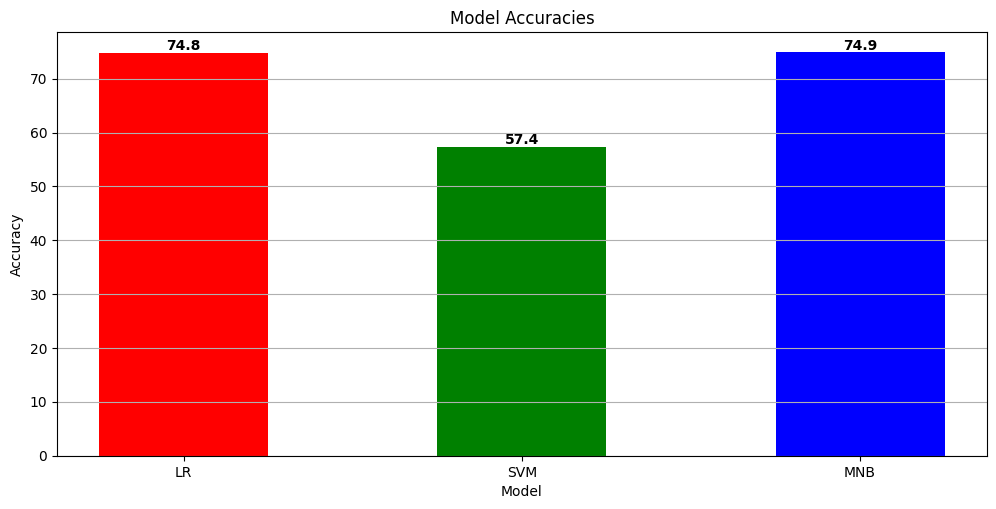

In [92]:
import matplotlib.pyplot as plt


# Create a bar chart
plt.close('all')
colors = ['red', 'green', 'blue']
plt.rcParams["figure.figsize"] = (12,5.5)
plt.bar(models, accuracy,color=colors,width=0.5)

# Add horizontal grid lines
plt.grid(True, axis='y')

# Add a title and axis labels
plt.title('Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')

# Rotate x-axis labels
# plt.xticks(rotation=45)

# Add value labels on top of each bar
for i, v in enumerate(accuracy):
    plt.text(i, v, str(v), ha='center', va='bottom', fontweight='bold')

# Display the chart
plt.show()

## TF-IDF

In [93]:
import pandas as pd
models=["LR","SVM","MNB"]
accuracy = []
accuracy.append(lr_tfidf_score)
accuracy.append(svm_tfidf_score)
accuracy.append(mnb_tfidf_score)

# Sample data
accuracy = np.array(accuracy)

# Convert to percent with one decimal place
accuracy = np.round(accuracy * 100, 1)

metrics = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy,
})

# Set Model column as index
metrics = metrics.set_index('Model')

# Display DataFrame
print(metrics)

# Print the results

       Accuracy
Model          
LR         74.9
SVM        51.1
MNB        74.9


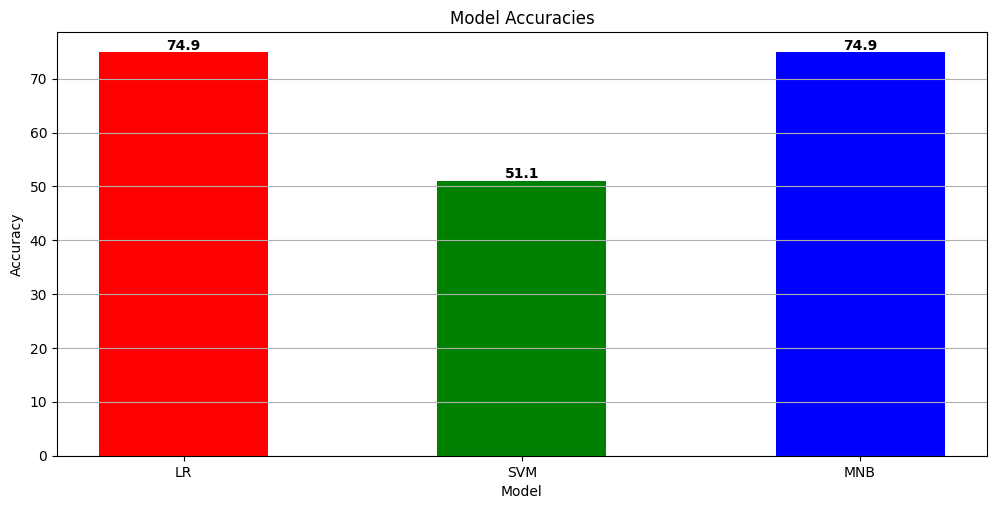

In [94]:
import matplotlib.pyplot as plt


# Create a bar chart
plt.close('all')
colors = ['red', 'green', 'blue']
plt.rcParams["figure.figsize"] = (12,5.5)
plt.bar(models, accuracy,color=colors,width=0.5)

# Add horizontal grid lines
plt.grid(True, axis='y')

# Add a title and axis labels
plt.title('Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')

# Rotate x-axis labels
# plt.xticks(rotation=45)

# Add value labels on top of each bar
for i, v in enumerate(accuracy):
    plt.text(i, v, str(v), ha='center', va='bottom', fontweight='bold')

# Display the chart
plt.show()

# Preparing Embedding layer

Let's now write the script for our embedding layer. Embedding layer converts our textual data into numeric form. It is then **used as the first layer for the deep learning models in Keras**.

In [95]:
# Embedding layer expects the words to be in numeric form 
# Using Tokenizer function from keras.preprocessing.text library
# Method fit_on_text trains the tokenizer 
# Method texts_to_sequences converts sentences to their numeric form

word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(X_train)

X_train = word_tokenizer.texts_to_sequences(X_train)
X_test = word_tokenizer.texts_to_sequences(X_test)

In [96]:
import io
import json

In [97]:
# Saving

tokenizer_json = word_tokenizer.to_json()
with io.open('b3_tokenizer.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(tokenizer_json, ensure_ascii=False))

In [98]:
# Adding 1 to store dimensions for words for which no pretrained word embeddings exist

vocab_length = len(word_tokenizer.word_index) + 1

vocab_length

92394

In [99]:
# Padding all reviews to fixed length 100

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [100]:
# Load GloVe word embeddings and create an Embeddings Dictionary

from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('a2_glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [101]:
# Create Embedding Matrix having 100 columns 
# Containing 100-dimensional GloVe word embeddings for all words in our corpus.

embedding_matrix = zeros((vocab_length, 100))
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [102]:
embedding_matrix.shape

(92394, 100)

In [226]:
data=[]

# Model Training with:

## Simple Neural Network (SNN) MODEL

In [104]:
# Neural Network architecture

snn_model = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)

snn_model.add(embedding_layer)

snn_model.add(Flatten())
snn_model.add(Dense(1, activation='sigmoid'))

In [105]:
# Model compiling

snn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

print(snn_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          9239400   
                                                                 
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 dense (Dense)               (None, 1)                 10001     
                                                                 
Total params: 9,249,401
Trainable params: 10,001
Non-trainable params: 9,239,400
_________________________________________________________________
None


In [109]:
# Model training

snn_model_history = snn_model.fit(X_train, y_train, batch_size=156, epochs=5, verbose=1, validation_split=0.20)

Epoch 1/5
206/206 [==============================] - 3s 8ms/step - loss: 0.5644 - acc: 0.7080 - val_loss: 0.5042 - val_acc: 0.7589
Epoch 2/5
206/206 [==============================] - 3s 13ms/step - loss: 0.4525 - acc: 0.7939 - val_loss: 0.4928 - val_acc: 0.7673
Epoch 3/5
206/206 [==============================] - 2s 12ms/step - loss: 0.4167 - acc: 0.8152 - val_loss: 0.4950 - val_acc: 0.7655
Epoch 4/5
206/206 [==============================] - 3s 13ms/step - loss: 0.3920 - acc: 0.8276 - val_loss: 0.5173 - val_acc: 0.7574
Epoch 5/5
206/206 [==============================] - 3s 13ms/step - loss: 0.3797 - acc: 0.8342 - val_loss: 0.5204 - val_acc: 0.7542


In [110]:
# Predictions on the Test Set

snn_score = snn_model.evaluate(X_test, y_test, verbose=1)

313/313 [==============================] - 1s 4ms/step - loss: 0.5458 - acc: 0.7503


In [111]:
# Model Performance

print("Test Score:", snn_score[0])
print("Test Accuracy:", snn_score[1])

Test Score: 0.5458316802978516
Test Accuracy: 0.7502999901771545


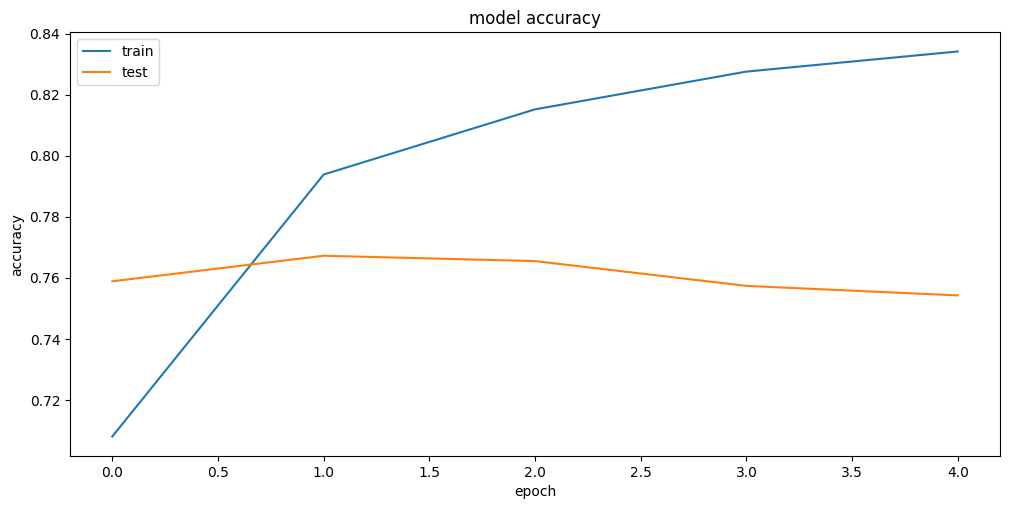

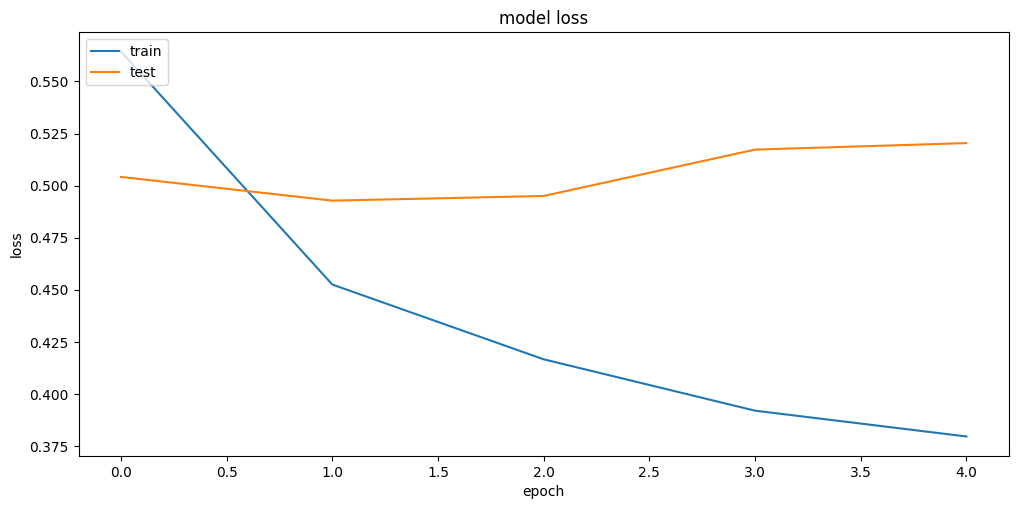

In [113]:
# Model Performance Charts

import matplotlib.pyplot as plt

plt.plot(snn_model_history.history['acc'])
plt.plot(snn_model_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(snn_model_history.history['loss'])
plt.plot(snn_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [114]:
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score, ConfusionMatrixDisplay
y_pred_proba = snn_model.predict(X_test)
y_pred = np.array([0 if proba < 0.5 else 1 for proba in y_pred_proba])
snn_report=classification_report(y_test, y_pred)
print(snn_report)

313/313 [==============================] - 2s 5ms/step
              precision    recall  f1-score   support

           0       0.78      0.69      0.73      4961
           1       0.73      0.81      0.77      5039

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



In [227]:
import tensorflow as tf
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

y_pred = tf.argmax(snn_model.predict(X_test), axis=-1)
y_true = tf.argmax(y_test, axis=-1)

# Obtain the predicted probabilities for each input instance
y_pred_prob = snn_model.predict(X_test)

# Apply a threshold to convert the probabilities to binary labels
y_pred = (y_pred_prob >= 0.5).astype(int)

# Calculate the f1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate the precision score
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate the recall score
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate the accuracy score
accuracy = round(snn_score[1]*100,2)


# Print the scores
print('F1 score: {:.4f}'.format(f1))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall Score: {:.2f}".format(recall))
print("Accuracy:", accuracy)


313/313 [==============================] - 1s 2ms/step
F1 score: 0.7493
Precision: 75.37%
Recall Score: 0.75
Accuracy: 75.03


In [228]:
data.append(["Simpe ANN", f1, precision, recall, accuracy])

<Figure size 500x500 with 0 Axes>

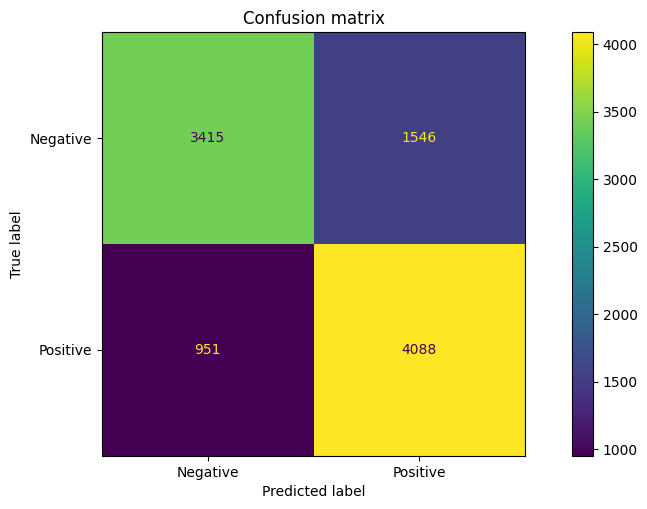

In [117]:
cm = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels = ['Negative', 'Positive'])
plt.figure(figsize = (5,5))
cm.plot()
plt.title('Confusion matrix')
plt.show()

## Convolutional Neural Network (CNN) MODEL

In [118]:
from keras.layers import Conv1D,MaxPooling1D,BatchNormalization,Dropout,GlobalMaxPooling1D,Dense
from tensorflow.keras.initializers import RandomNormal, Constant

In [130]:
# Neural Network architecture

cnn_model = Sequential()

embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
cnn_model.add(embedding_layer)

cnn_model.add(Conv1D(108, 5, activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=3,strides=1, padding='same'))
cnn_model.add(BatchNormalization(momentum=0.95, epsilon=0.005,beta_initializer=RandomNormal(mean=0.0, stddev=0.05), gamma_initializer=Constant(value=0.9)))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dropout(0.15))
cnn_model.add(Dense(1, activation='sigmoid'))

In [131]:
# Model compiling

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(cnn_model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 100)          9239400   
                                                                 
 conv1d_3 (Conv1D)           (None, 96, 108)           54108     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 96, 108)          0         
 1D)                                                             
                                                                 
 batch_normalization_3 (Batc  (None, 96, 108)          432       
 hNormalization)                                                 
                                                                 
 global_max_pooling1d_3 (Glo  (None, 108)              0         
 balMaxPooling1D)                                                
                                                      

In [132]:
# Model training

cnn_model_history = cnn_model.fit(X_train, y_train, batch_size=156, epochs=5, verbose=1, validation_split=0.20)

Epoch 1/5
206/206 [==============================] - 20s 93ms/step - loss: 0.5755 - acc: 0.7245 - val_loss: 0.3880 - val_acc: 0.8279
Epoch 2/5
206/206 [==============================] - 18s 88ms/step - loss: 0.3943 - acc: 0.8237 - val_loss: 0.3600 - val_acc: 0.8394
Epoch 3/5
206/206 [==============================] - 18s 89ms/step - loss: 0.3393 - acc: 0.8501 - val_loss: 0.3533 - val_acc: 0.8406
Epoch 4/5
206/206 [==============================] - 19s 95ms/step - loss: 0.2999 - acc: 0.8708 - val_loss: 0.3538 - val_acc: 0.8443
Epoch 5/5
206/206 [==============================] - 18s 88ms/step - loss: 0.2723 - acc: 0.8849 - val_loss: 0.3657 - val_acc: 0.8376


In [133]:
# Predictions on the Test Set

cnn_score = cnn_model.evaluate(X_test, y_test, verbose=1)

313/313 [==============================] - 2s 8ms/step - loss: 0.3686 - acc: 0.8384


In [134]:
# Model Performance

print("Test Score:", cnn_score[0])
print("Test Accuracy:", cnn_score[1])

Test Score: 0.3685673475265503
Test Accuracy: 0.8384000062942505


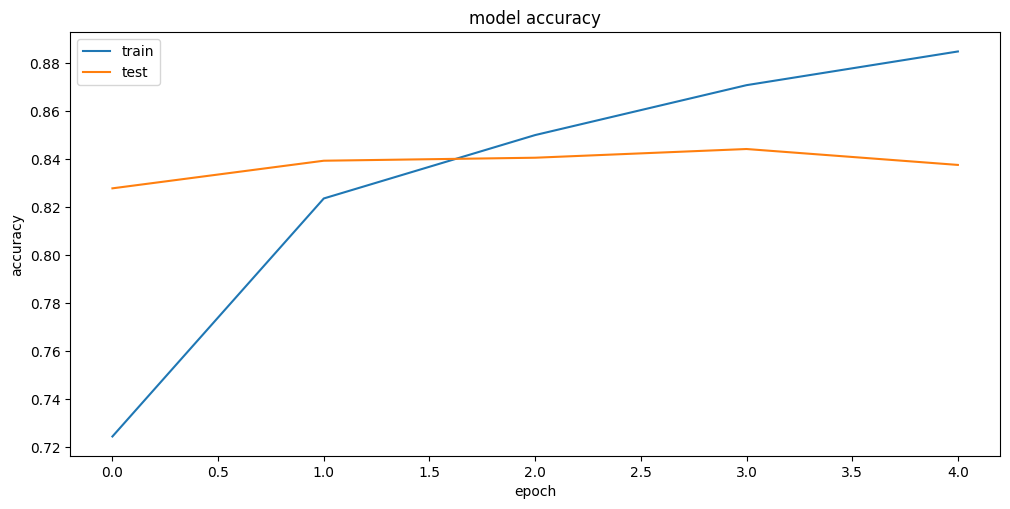

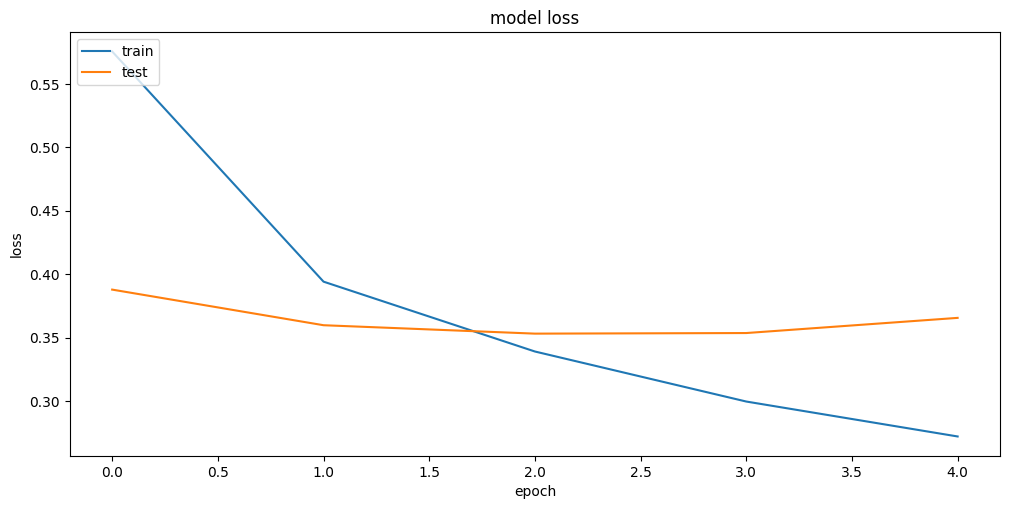

In [136]:
# Model Performance Charts

import matplotlib.pyplot as plt

plt.plot(cnn_model_history.history['acc'])
plt.plot(cnn_model_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(cnn_model_history.history['loss'])
plt.plot(cnn_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

In [137]:
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score, ConfusionMatrixDisplay
y_pred_proba = cnn_model.predict(X_test)
y_pred = np.array([0 if proba < 0.5 else 1 for proba in y_pred_proba])
cnn_report=classification_report(y_test, y_pred)
print(cnn_report)

313/313 [==============================] - 3s 7ms/step
              precision    recall  f1-score   support

           0       0.87      0.79      0.83      4961
           1       0.81      0.89      0.85      5039

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



In [229]:
import tensorflow as tf
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

y_pred = tf.argmax(cnn_model.predict(X_test), axis=-1)
y_true = tf.argmax(y_test, axis=-1)

# Obtain the predicted probabilities for each input instance
y_pred_prob = cnn_model.predict(X_test)

# Apply a threshold to convert the probabilities to binary labels
y_pred = (y_pred_prob >= 0.5).astype(int)

# Calculate the f1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate the precision score
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate the recall score
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate the accuracy score
accuracy = round(cnn_score[1]*100,2)


# Print the scores
print('F1 score: {:.4f}'.format(f1))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall Score: {:.2f}".format(recall))
print("Accuracy:", accuracy)

313/313 [==============================] - 1s 4ms/step
F1 score: 0.8380
Precision: 84.12%
Recall Score: 0.84
Accuracy: 83.84


In [230]:
data.append(["CNN", f1, precision, recall, accuracy])

<Figure size 500x500 with 0 Axes>

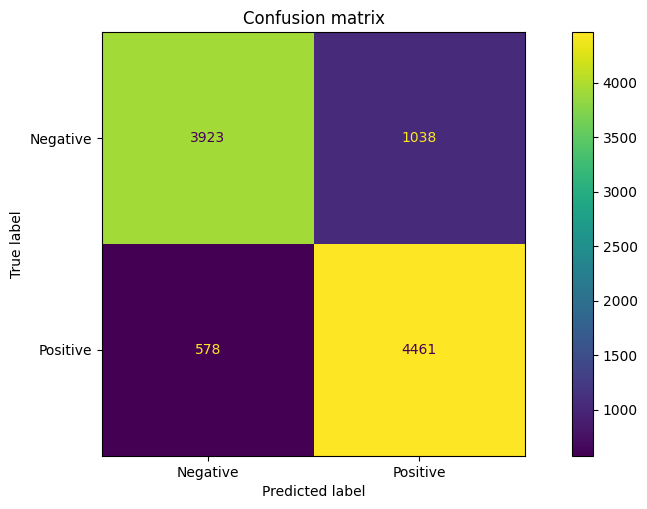

In [140]:
cm = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels = ['Negative', 'Positive'])
plt.figure(figsize = (5,5))
cm.plot()
plt.title('Confusion matrix')
plt.show()

## OPTIMIZED CNN MODEL

In [143]:
# Neural Network architecture

cnnop_model = Sequential()

embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
cnnop_model.add(embedding_layer)

cnnop_model.add(Conv1D(88, 5, activation='relu'))
cnnop_model.add(GlobalMaxPooling1D())
cnnop_model.add(Dense(1, activation='sigmoid'))

In [144]:
# Model compiling

cnnop_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(cnnop_model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 100, 100)          9239400   
                                                                 
 conv1d_5 (Conv1D)           (None, 96, 88)            44088     
                                                                 
 global_max_pooling1d_5 (Glo  (None, 88)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_6 (Dense)             (None, 1)                 89        
                                                                 
Total params: 9,283,577
Trainable params: 44,177
Non-trainable params: 9,239,400
_________________________________________________________________
None


In [145]:
# Model training

cnnop_model_history = cnnop_model.fit(X_train, y_train, batch_size=156, epochs=5, verbose=1, validation_split=0.20)

Epoch 1/5
206/206 [==============================] - 11s 45ms/step - loss: 0.5007 - acc: 0.7553 - val_loss: 0.4006 - val_acc: 0.8223
Epoch 2/5
206/206 [==============================] - 9s 45ms/step - loss: 0.3626 - acc: 0.8428 - val_loss: 0.3662 - val_acc: 0.8363
Epoch 3/5
206/206 [==============================] - 9s 43ms/step - loss: 0.3131 - acc: 0.8707 - val_loss: 0.3507 - val_acc: 0.8428
Epoch 4/5
206/206 [==============================] - 9s 42ms/step - loss: 0.2754 - acc: 0.8904 - val_loss: 0.3559 - val_acc: 0.8406
Epoch 5/5
206/206 [==============================] - 9s 41ms/step - loss: 0.2432 - acc: 0.9084 - val_loss: 0.3438 - val_acc: 0.8491


In [146]:
# Predictions on the Test Set

cnnop_score = cnnop_model.evaluate(X_test, y_test, verbose=1)

313/313 [==============================] - 2s 5ms/step - loss: 0.3493 - acc: 0.8443


In [147]:
# Model Performance

print("Test Score:", cnnop_score[0])
print("Test Accuracy:", cnnop_score[1])

Test Score: 0.3493046164512634
Test Accuracy: 0.8442999720573425


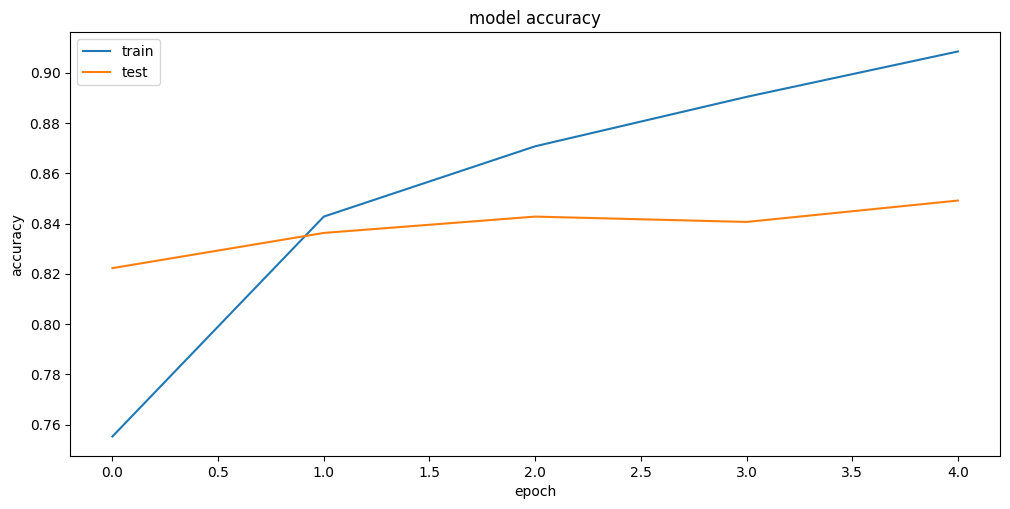

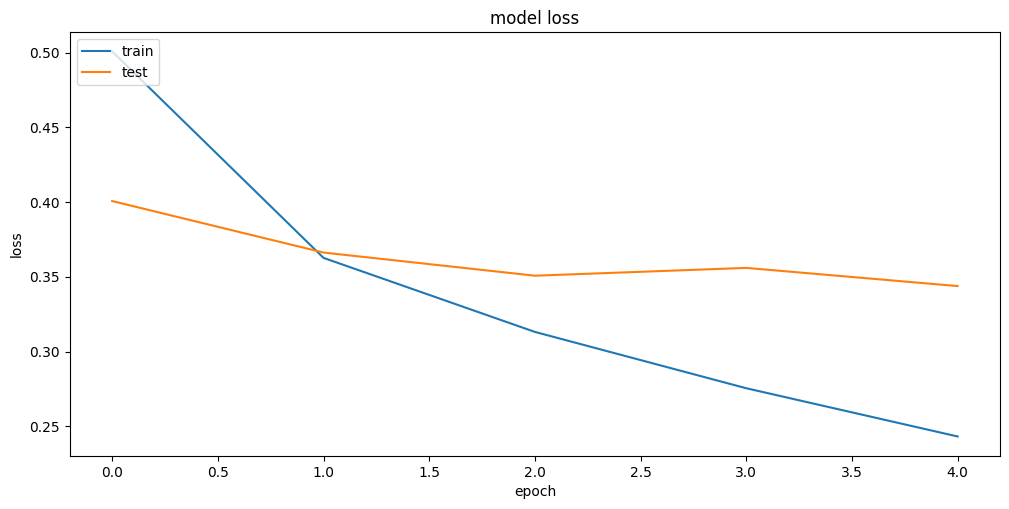

In [149]:
# Model Performance Charts

import matplotlib.pyplot as plt

plt.plot(cnnop_model_history.history['acc'])
plt.plot(cnnop_model_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(cnnop_model_history.history['loss'])
plt.plot(cnnop_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

In [150]:
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score, ConfusionMatrixDisplay
y_pred_proba = cnn_model.predict(X_test)
y_pred = np.array([0 if proba < 0.5 else 1 for proba in y_pred_proba])
cnnop_report=classification_report(y_test, y_pred)
print(cnnop_report)

313/313 [==============================] - 2s 7ms/step
              precision    recall  f1-score   support

           0       0.87      0.79      0.83      4961
           1       0.81      0.89      0.85      5039

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



In [231]:
import tensorflow as tf
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

y_pred = tf.argmax(cnnop_model.predict(X_test), axis=-1)
y_true = tf.argmax(y_test, axis=-1)

# Obtain the predicted probabilities for each input instance
y_pred_prob = cnnop_model.predict(X_test)

# Apply a threshold to convert the probabilities to binary labels
y_pred = (y_pred_prob >= 0.5).astype(int)

# Calculate the f1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate the precision score
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate the recall score
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate the accuracy score
accuracy = round(cnnop_score[1]*100,2)


# Print the scores
print('F1 score: {:.4f}'.format(f1))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall Score: {:.2f}".format(recall))
print("Accuracy:", accuracy)

313/313 [==============================] - 1s 3ms/step
F1 score: 0.8440
Precision: 84.68%
Recall Score: 0.84
Accuracy: 84.43


In [232]:
data.append(["CNNOP", f1, precision, recall, accuracy])

<Figure size 500x500 with 0 Axes>

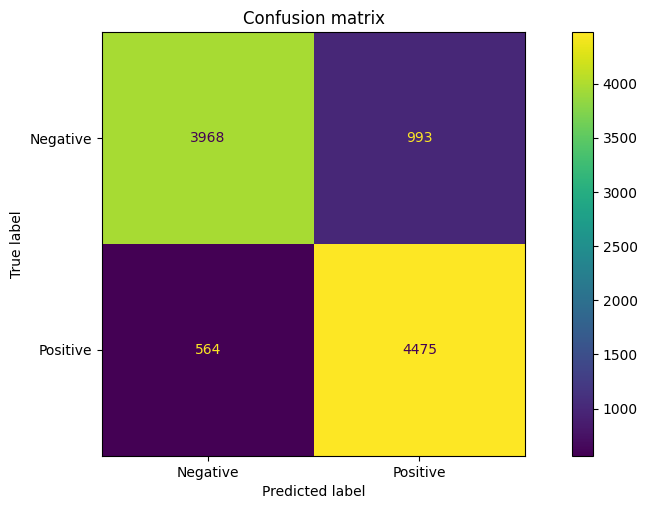

In [153]:
cm = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels = ['Negative', 'Positive'])
plt.figure(figsize = (5,5))
cm.plot()
plt.title('Confusion matrix')
plt.show()

## Recurrent Neural Network (LSTM) MODEL

In [154]:
from keras.layers import LSTM

In [155]:
# Neural Network architecture

lstm_model = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)

lstm_model.add(embedding_layer)
lstm_model.add(LSTM(116))

lstm_model.add(Dense(1, activation='sigmoid'))

In [156]:
# Model compiling

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(lstm_model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 100, 100)          9239400   
                                                                 
 lstm (LSTM)                 (None, 116)               100688    
                                                                 
 dense_7 (Dense)             (None, 1)                 117       
                                                                 
Total params: 9,340,205
Trainable params: 100,805
Non-trainable params: 9,239,400
_________________________________________________________________
None


In [157]:
# Model Training

lstm_model_history = lstm_model.fit(X_train, y_train, batch_size=156, epochs=5, verbose=1, validation_split=0.20)

Epoch 1/5
206/206 [==============================] - 54s 248ms/step - loss: 0.5591 - acc: 0.7123 - val_loss: 0.4989 - val_acc: 0.7790
Epoch 2/5
206/206 [==============================] - 51s 248ms/step - loss: 0.4461 - acc: 0.7985 - val_loss: 0.4024 - val_acc: 0.8201
Epoch 3/5
206/206 [==============================] - 51s 247ms/step - loss: 0.4004 - acc: 0.8216 - val_loss: 0.3745 - val_acc: 0.8379
Epoch 4/5
206/206 [==============================] - 49s 240ms/step - loss: 0.3584 - acc: 0.8449 - val_loss: 0.3875 - val_acc: 0.8219
Epoch 5/5
206/206 [==============================] - 51s 245ms/step - loss: 0.3396 - acc: 0.8539 - val_loss: 0.3341 - val_acc: 0.8569


In [158]:
# Predictions on the Test Set

lstm_score = lstm_model.evaluate(X_test, y_test, verbose=1)

313/313 [==============================] - 13s 42ms/step - loss: 0.3361 - acc: 0.8519


In [159]:
# Model Performance

print("Test Score:", lstm_score[0])
print("Test Accuracy:", lstm_score[1])

Test Score: 0.33607250452041626
Test Accuracy: 0.8518999814987183


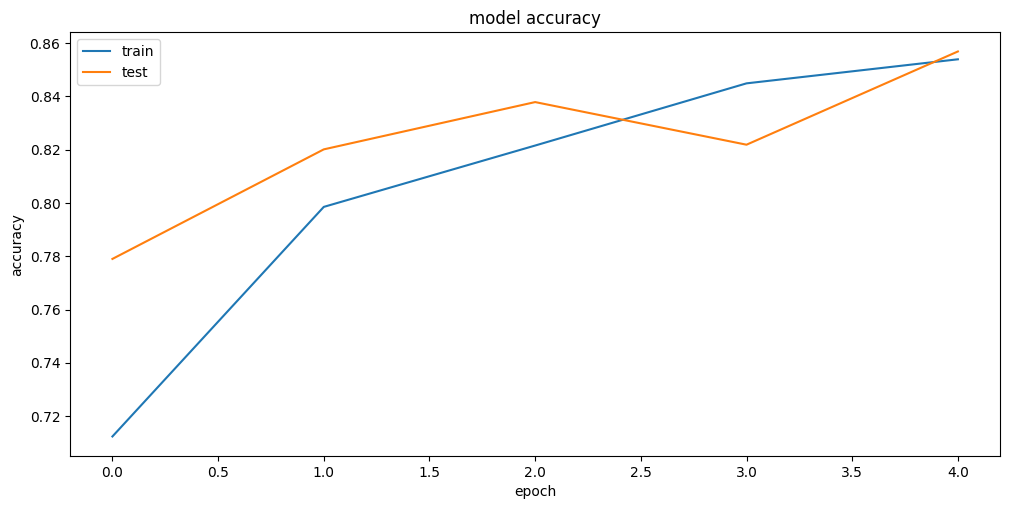

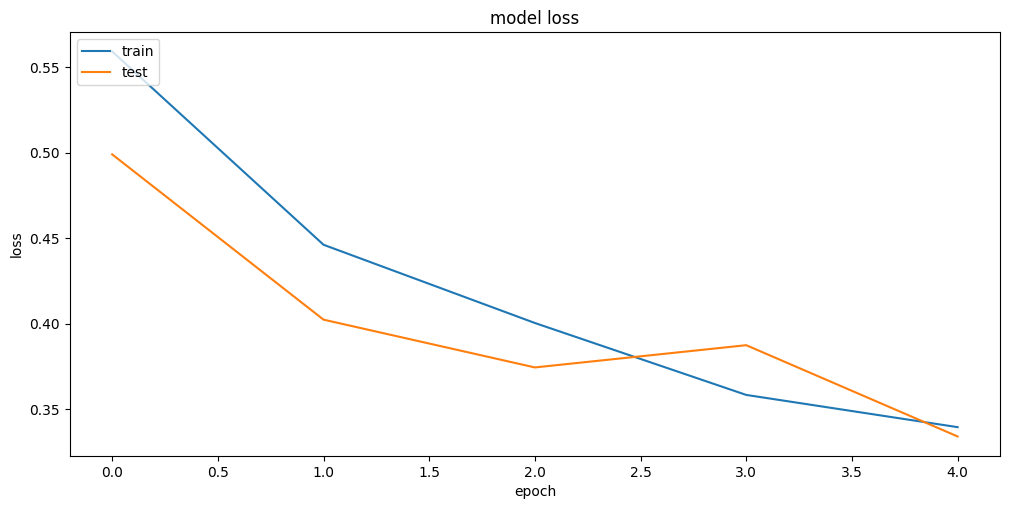

In [161]:
# Model Performance Charts

import matplotlib.pyplot as plt

plt.plot(lstm_model_history.history['acc'])
plt.plot(lstm_model_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(lstm_model_history.history['loss'])
plt.plot(lstm_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [162]:
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score, ConfusionMatrixDisplay
y_pred_proba = lstm_model.predict(X_test)
y_pred = np.array([0 if proba < 0.5 else 1 for proba in y_pred_proba])
lstm_report=classification_report(y_test, y_pred)
print(lstm_report)

313/313 [==============================] - 13s 38ms/step
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      4961
           1       0.87      0.83      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [233]:
import tensorflow as tf
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

y_pred = tf.argmax(lstm_model.predict(X_test), axis=-1)
y_true = tf.argmax(y_test, axis=-1)

# Obtain the predicted probabilities for each input instance
y_pred_prob = lstm_model.predict(X_test)

# Apply a threshold to convert the probabilities to binary labels
y_pred = (y_pred_prob >= 0.5).astype(int)

# Calculate the f1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate the precision score
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate the recall score
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate the accuracy score
accuracy = round(lstm_score[1]*100,2)


# Print the scores
print('F1 score: {:.4f}'.format(f1))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall Score: {:.2f}".format(recall))
print("Accuracy:", accuracy)

313/313 [==============================] - 7s 21ms/step
F1 score: 0.8519
Precision: 85.26%
Recall Score: 0.85
Accuracy: 85.19


In [234]:
data.append(["LSTM", f1, precision, recall, accuracy])

<Figure size 500x500 with 0 Axes>

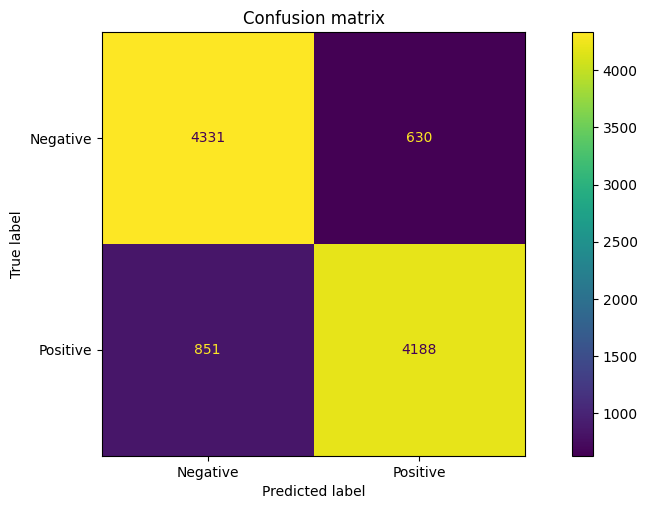

In [165]:
cm = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels = ['Negative', 'Positive'])
plt.figure(figsize = (5,5))
cm.plot()
plt.title('Confusion matrix')
plt.show()

## BI-LSTM MODEL

In [166]:
from keras.layers import LSTM,Bidirectional,Conv1D

In [167]:
# Neural Network architecture

bilstm_model = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)

bilstm_model.add(embedding_layer)
bilstm_model.add(Bidirectional(LSTM(76)))

bilstm_model.add(Dense(116, activation='sigmoid'))
bilstm_model.add(Dropout(0.15))
bilstm_model.add(Dense(48, activation='sigmoid'))
bilstm_model.add(Dropout(0.20))

bilstm_model.add(Dense(1, activation='sigmoid'))

In [168]:
# Model compiling

bilstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(bilstm_model.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 100, 100)          9239400   
                                                                 
 bidirectional (Bidirectiona  (None, 152)              107616    
 l)                                                              
                                                                 
 dense_8 (Dense)             (None, 116)               17748     
                                                                 
 dropout_4 (Dropout)         (None, 116)               0         
                                                                 
 dense_9 (Dense)             (None, 48)                5616      
                                                                 
 dropout_5 (Dropout)         (None, 48)                0         
                                                      

In [169]:
# Model Training

bilstm_model_history = bilstm_model.fit(X_train, y_train, batch_size=156, epochs=5, verbose=1, validation_split=0.20)

Epoch 1/5
206/206 [==============================] - 62s 279ms/step - loss: 0.6014 - acc: 0.6705 - val_loss: 0.4699 - val_acc: 0.7847
Epoch 2/5
206/206 [==============================] - 50s 245ms/step - loss: 0.4588 - acc: 0.7918 - val_loss: 0.4203 - val_acc: 0.8099
Epoch 3/5
206/206 [==============================] - 51s 249ms/step - loss: 0.4019 - acc: 0.8217 - val_loss: 0.3842 - val_acc: 0.8376
Epoch 4/5
206/206 [==============================] - 52s 254ms/step - loss: 0.3656 - acc: 0.8395 - val_loss: 0.3765 - val_acc: 0.8350
Epoch 5/5
206/206 [==============================] - 51s 250ms/step - loss: 0.3403 - acc: 0.8534 - val_loss: 0.3371 - val_acc: 0.8554


In [170]:
# Predictions on the Test Set

bilstm_score = bilstm_model.evaluate(X_test, y_test, verbose=1)

313/313 [==============================] - 9s 28ms/step - loss: 0.3461 - acc: 0.8527


In [171]:
# Model Performance

print("Test Score:", bilstm_score[0])
print("Test Accuracy:", bilstm_score[1])

Test Score: 0.3460541367530823
Test Accuracy: 0.8526999950408936


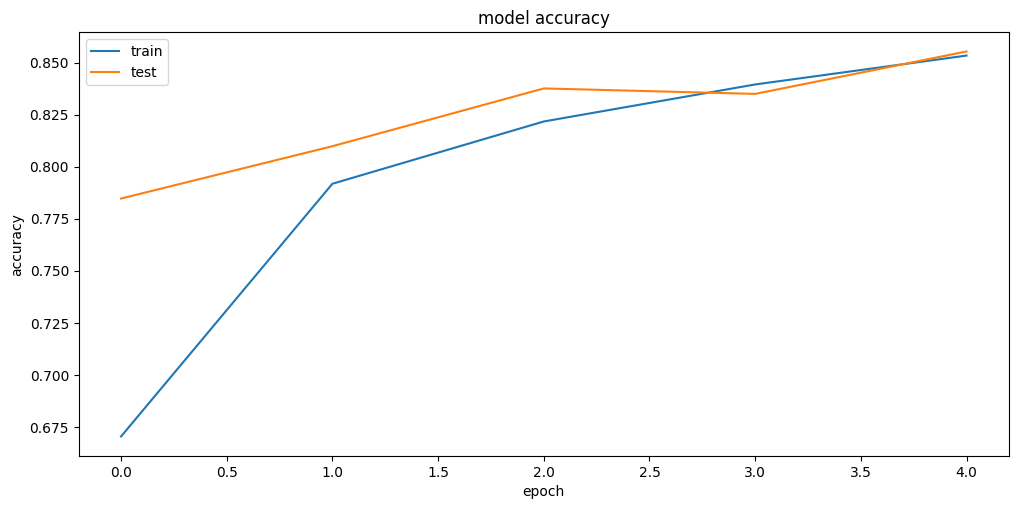

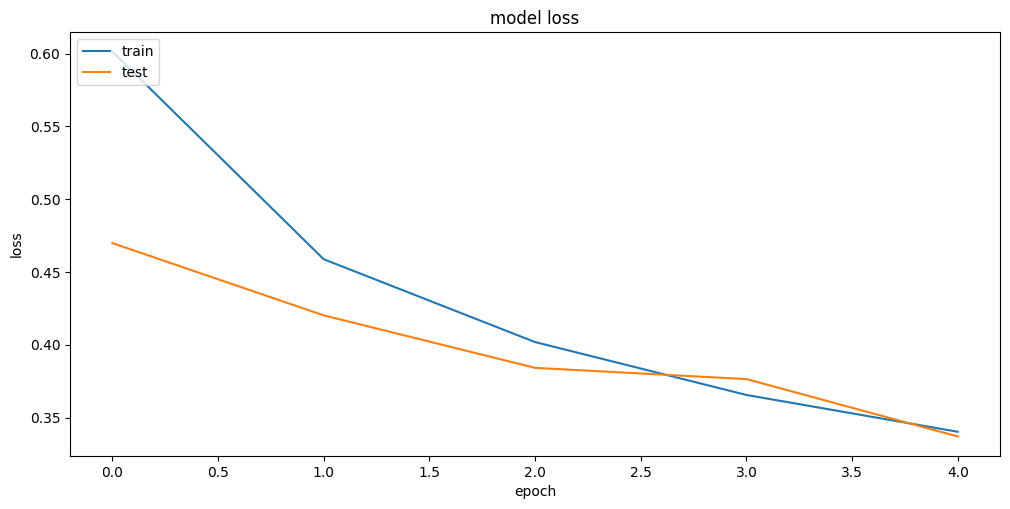

In [173]:
# Model Performance Charts

import matplotlib.pyplot as plt

plt.plot(bilstm_model_history.history['acc'])
plt.plot(bilstm_model_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(bilstm_model_history.history['loss'])
plt.plot(bilstm_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [174]:
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score, ConfusionMatrixDisplay
y_pred_proba = bilstm_model.predict(X_test)
y_pred = np.array([0 if proba < 0.5 else 1 for proba in y_pred_proba])
bilstm_report=classification_report(y_test, y_pred)
print(bilstm_report)

313/313 [==============================] - 10s 28ms/step
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      4961
           1       0.88      0.82      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [235]:
import tensorflow as tf
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

y_pred = tf.argmax(bilstm_model.predict(X_test), axis=-1)
y_true = tf.argmax(y_test, axis=-1)

# Obtain the predicted probabilities for each input instance
y_pred_prob = bilstm_model.predict(X_test)

# Apply a threshold to convert the probabilities to binary labels
y_pred = (y_pred_prob >= 0.5).astype(int)

# Calculate the f1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate the precision score
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate the recall score
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate the accuracy score
accuracy = round(bilstm_score[1]*100,2)


# Print the scores
print('F1 score: {:.4f}'.format(f1))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall Score: {:.2f}".format(recall))
print("Accuracy:", accuracy)

313/313 [==============================] - 6s 20ms/step
F1 score: 0.8526
Precision: 85.44%
Recall Score: 0.85
Accuracy: 85.27


In [236]:
data.append(["BILSTM", f1, precision, recall, accuracy])

<Figure size 500x500 with 0 Axes>

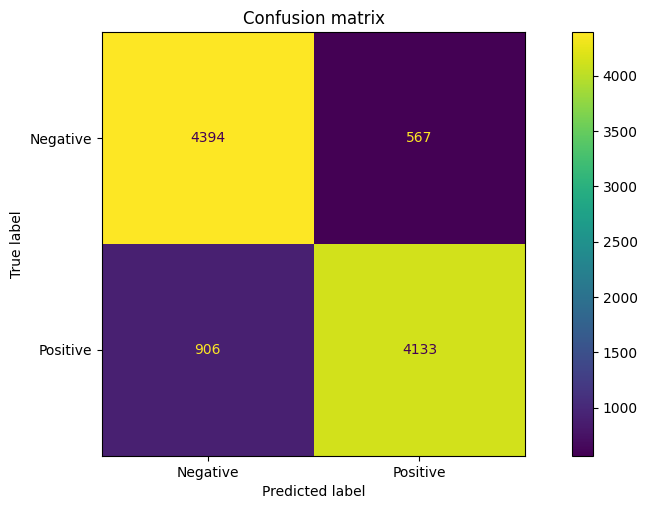

In [177]:
cm = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels = ['Negative', 'Positive'])
plt.figure(figsize = (5,5))
cm.plot()
plt.title('Confusion matrix')
plt.show()

## CNN-LSTM Model

In [178]:
from keras.layers import LSTM,Bidirectional,Conv1D

cnn_lstm_model=Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)

cnn_lstm_model.add(embedding_layer)

cnn_lstm_model.add(Conv1D(128, 5, activation='relu'))

cnn_lstm_model.add(LSTM(52))

cnn_lstm_model.add(Dense(1, activation='sigmoid'))

In [179]:
# Model compiling

cnn_lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(cnn_lstm_model.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 100, 100)          9239400   
                                                                 
 conv1d_6 (Conv1D)           (None, 96, 128)           64128     
                                                                 
 lstm_2 (LSTM)               (None, 52)                37648     
                                                                 
 dense_11 (Dense)            (None, 1)                 53        
                                                                 
Total params: 9,341,229
Trainable params: 101,829
Non-trainable params: 9,239,400
_________________________________________________________________
None


In [180]:
# Model Training

cnn_lstm_model_history = cnn_lstm_model.fit(X_train, y_train, batch_size=156, epochs=5, verbose=1, validation_split=0.20)

Epoch 1/5
206/206 [==============================] - 38s 168ms/step - loss: 0.6203 - acc: 0.6486 - val_loss: 0.5084 - val_acc: 0.7719
Epoch 2/5
206/206 [==============================] - 33s 162ms/step - loss: 0.4752 - acc: 0.7787 - val_loss: 0.4314 - val_acc: 0.8106
Epoch 3/5
206/206 [==============================] - 34s 165ms/step - loss: 0.4050 - acc: 0.8188 - val_loss: 0.4536 - val_acc: 0.8002
Epoch 4/5
206/206 [==============================] - 34s 166ms/step - loss: 0.3604 - acc: 0.8426 - val_loss: 0.3504 - val_acc: 0.8459
Epoch 5/5
206/206 [==============================] - 34s 165ms/step - loss: 0.3243 - acc: 0.8609 - val_loss: 0.3479 - val_acc: 0.8497


In [181]:
# Predictions on the Test Set

cnn_lstm_score = cnn_lstm_model.evaluate(X_test, y_test, verbose=1)

313/313 [==============================] - 7s 23ms/step - loss: 0.3589 - acc: 0.8452


In [182]:
# Model Performance

print("Test Score:", cnn_lstm_score[0])
print("Test Accuracy:", cnn_lstm_score[1])

Test Score: 0.35894423723220825
Test Accuracy: 0.8452000021934509


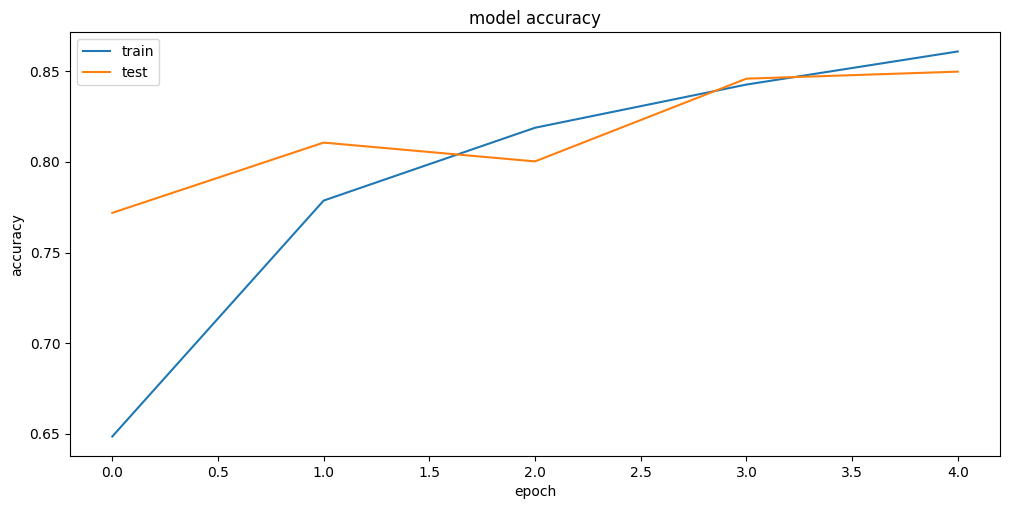

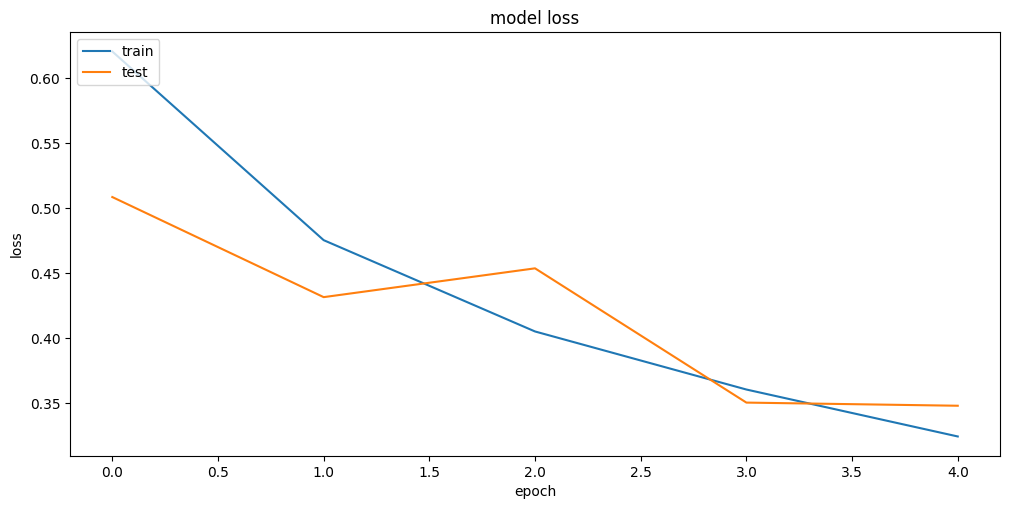

In [184]:
# Model Performance Charts

import matplotlib.pyplot as plt

plt.plot(cnn_lstm_model_history.history['acc'])
plt.plot(cnn_lstm_model_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(cnn_lstm_model_history.history['loss'])
plt.plot(cnn_lstm_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [185]:
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score, ConfusionMatrixDisplay
y_pred_proba = cnn_lstm_model.predict(X_test)
y_pred = np.array([0 if proba < 0.5 else 1 for proba in y_pred_proba])
cnn_lstm_report=classification_report(y_test, y_pred)
print(cnn_lstm_report)

313/313 [==============================] - 8s 24ms/step
              precision    recall  f1-score   support

           0       0.88      0.79      0.84      4961
           1       0.82      0.90      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.84      0.84     10000
weighted avg       0.85      0.85      0.84     10000



In [237]:
import tensorflow as tf
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

y_pred = tf.argmax(cnn_lstm_model.predict(X_test), axis=-1)
y_true = tf.argmax(y_test, axis=-1)

# Obtain the predicted probabilities for each input instance
y_pred_prob = cnn_lstm_model.predict(X_test)

# Apply a threshold to convert the probabilities to binary labels
y_pred = (y_pred_prob >= 0.5).astype(int)

# Calculate the f1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate the precision score
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate the recall score
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate the accuracy score
accuracy = round(cnn_lstm_score[1]*100,2)


# Print the scores
print('F1 score: {:.4f}'.format(f1))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall Score: {:.2f}".format(recall))
print("Accuracy:", accuracy)

313/313 [==============================] - 5s 16ms/step
F1 score: 0.8448
Precision: 84.84%
Recall Score: 0.85
Accuracy: 84.52


In [238]:
data.append(["CNN-LSTM", f1, precision, recall, accuracy])

<Figure size 500x500 with 0 Axes>

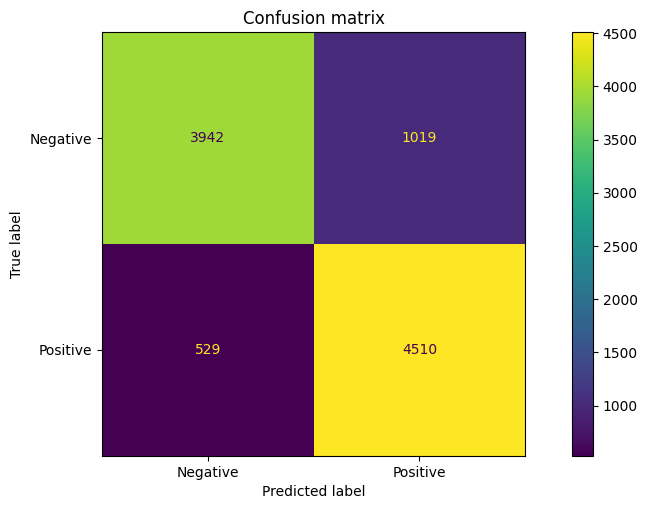

In [188]:
cm = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels = ['Negative', 'Positive'])
plt.figure(figsize = (5,5))
cm.plot()
plt.title('Confusion matrix')
plt.show()

## CNN-BI LSTM MODEL

In [215]:
from keras.layers import LSTM,Bidirectional,Conv1D

cnn_bilstm_model=Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)

cnn_bilstm_model.add(embedding_layer)

cnn_bilstm_model.add(Conv1D(164, 5, activation='relu'))

cnn_bilstm_model.add(Bidirectional(LSTM(48)))
cnn_bilstm_model.add(Dropout(0.1))

cnn_bilstm_model.add(Dense(1, activation='sigmoid'))

In [216]:
# Model compiling

cnn_bilstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(cnn_bilstm_model.summary())

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 100, 100)          9239400   
                                                                 
 conv1d_12 (Conv1D)          (None, 96, 164)           82164     
                                                                 
 bidirectional_4 (Bidirectio  (None, 96)               81792     
 nal)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 96)                0         
                                                                 
 dense_17 (Dense)            (None, 1)                 97        
                                                                 
Total params: 9,403,453
Trainable params: 164,053
Non-trainable params: 9,239,400
_____________________________________

In [217]:
# Model Training

cnn_bilstm_model_history = cnn_bilstm_model.fit(X_train, y_train, batch_size=156, epochs=5, verbose=1, validation_split=0.20)

Epoch 1/5
206/206 [==============================] - 46s 210ms/step - loss: 0.5085 - acc: 0.7514 - val_loss: 0.4252 - val_acc: 0.8096
Epoch 2/5
206/206 [==============================] - 42s 206ms/step - loss: 0.3981 - acc: 0.8222 - val_loss: 0.3618 - val_acc: 0.8400
Epoch 3/5
206/206 [==============================] - 44s 213ms/step - loss: 0.3430 - acc: 0.8509 - val_loss: 0.3551 - val_acc: 0.8479
Epoch 4/5
206/206 [==============================] - 44s 216ms/step - loss: 0.3121 - acc: 0.8678 - val_loss: 0.3384 - val_acc: 0.8530
Epoch 5/5
206/206 [==============================] - 45s 220ms/step - loss: 0.2631 - acc: 0.8931 - val_loss: 0.3454 - val_acc: 0.8564


In [218]:
# Predictions on the Test Set

cnn_bilstm_score = cnn_bilstm_model.evaluate(X_test, y_test, verbose=1)

313/313 [==============================] - 6s 19ms/step - loss: 0.3463 - acc: 0.8547


In [219]:
# Model Performance

print("Test Score:", cnn_bilstm_score[0])
print("Test Accuracy:", cnn_bilstm_score[1])

Test Score: 0.3462907671928406
Test Accuracy: 0.8547000288963318


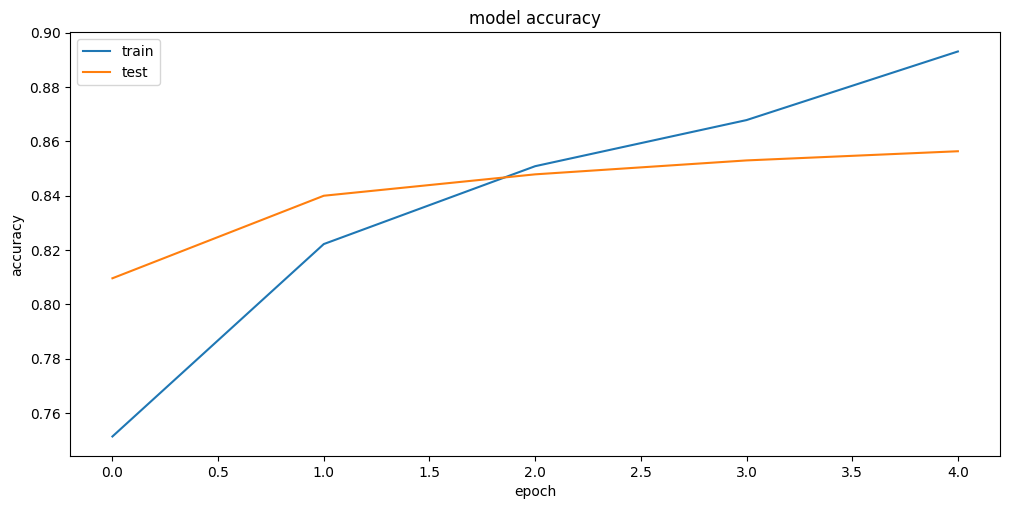

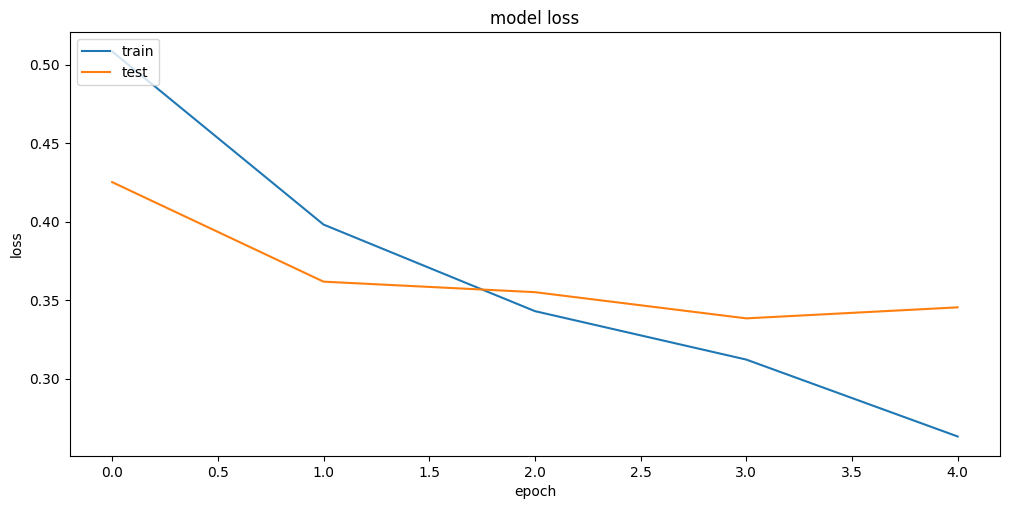

In [221]:
# Model Performance Charts

import matplotlib.pyplot as plt

plt.plot(cnn_bilstm_model_history.history['acc'])
plt.plot(cnn_bilstm_model_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(cnn_bilstm_model_history.history['loss'])
plt.plot(cnn_bilstm_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [222]:
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score, ConfusionMatrixDisplay
y_pred_proba = cnn_bilstm_model.predict(X_test)
y_pred = np.array([0 if proba < 0.5 else 1 for proba in y_pred_proba])
cnn_bilstm_report=classification_report(y_test, y_pred)
print(cnn_bilstm_report)

313/313 [==============================] - 7s 19ms/step
              precision    recall  f1-score   support

           0       0.90      0.80      0.85      4961
           1       0.82      0.91      0.86      5039

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000



In [239]:
import tensorflow as tf
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

y_pred = tf.argmax(cnn_bilstm_model.predict(X_test), axis=-1)
y_true = tf.argmax(y_test, axis=-1)

# Obtain the predicted probabilities for each input instance
y_pred_prob = cnn_bilstm_model.predict(X_test)

# Apply a threshold to convert the probabilities to binary labels
y_pred = (y_pred_prob >= 0.5).astype(int)

# Calculate the f1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate the precision score
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate the recall score
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate the accuracy score
accuracy = round(cnn_bilstm_score[1]*100,2)


# Print the scores
print('F1 score: {:.4f}'.format(f1))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall Score: {:.2f}".format(recall))
print("Accuracy:", accuracy)

313/313 [==============================] - 6s 19ms/step
F1 score: 0.8542
Precision: 85.86%
Recall Score: 0.85
Accuracy: 85.47


In [240]:
data.append(["CNN-BILSTM", f1, precision, recall, accuracy])

<Figure size 500x500 with 0 Axes>

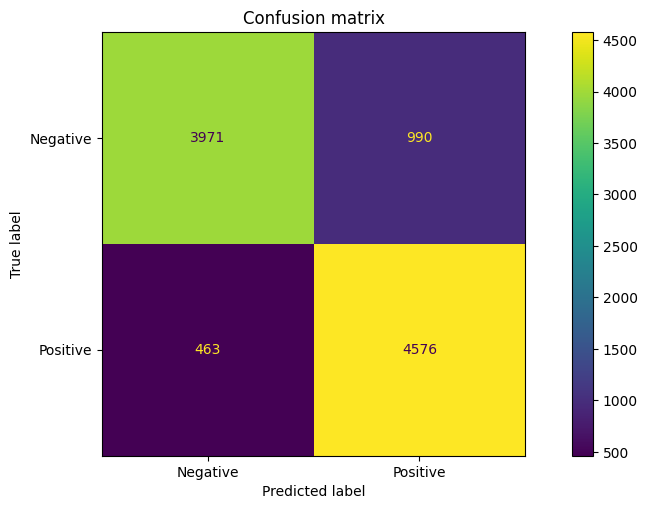

In [225]:
cm = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels = ['Negative', 'Positive'])
plt.figure(figsize = (5,5))
cm.plot()
plt.title('Confusion matrix')
plt.show()

## HYBRID NEURAL NETWORK (HNN) MODEL

In [204]:
from keras.layers import LSTM,Bidirectional,Conv1D,Flatten,MaxPooling1D,Dropout
from tensorflow.keras.initializers import RandomNormal, Constant

hybrid_model=Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)

hybrid_model.add(embedding_layer)

hybrid_model.add(Conv1D(500,5,activation='relu'))
hybrid_model.add(Conv1D(200,5,activation='relu'))
hybrid_model.add(MaxPooling1D(pool_size=3,strides=1, padding='same'))

hybrid_model.add(Dropout(0.1))

hybrid_model.add(Bidirectional(LSTM(60,return_sequences=True)))
hybrid_model.add(LSTM(64))

hybrid_model.add(Flatten())
hybrid_model.add(Dense(24))

hybrid_model.add(Dense(1, activation='sigmoid'))

In [205]:
# Model compiling

hybrid_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(hybrid_model.summary())

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 100, 100)          9239400   
                                                                 
 conv1d_10 (Conv1D)          (None, 96, 500)           250500    
                                                                 
 conv1d_11 (Conv1D)          (None, 92, 200)           500200    
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 92, 200)          0         
 1D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 92, 200)           0         
                                                                 
 bidirectional_3 (Bidirectio  (None, 92, 120)          125280    
 nal)                                                

In [206]:
# Model Training

hybrid_model_history = hybrid_model.fit(X_train, y_train, batch_size=156, epochs=5, verbose=1, validation_split=0.20)

Epoch 1/5
206/206 [==============================] - 201s 939ms/step - loss: 0.5324 - acc: 0.7169 - val_loss: 0.4586 - val_acc: 0.7840
Epoch 2/5
206/206 [==============================] - 155s 754ms/step - loss: 0.3951 - acc: 0.8244 - val_loss: 0.3471 - val_acc: 0.8460
Epoch 3/5
206/206 [==============================] - 155s 753ms/step - loss: 0.3242 - acc: 0.8629 - val_loss: 0.3327 - val_acc: 0.8620
Epoch 4/5
206/206 [==============================] - 161s 782ms/step - loss: 0.2752 - acc: 0.8884 - val_loss: 0.3453 - val_acc: 0.8596
Epoch 5/5
206/206 [==============================] - 161s 784ms/step - loss: 0.1849 - acc: 0.9314 - val_loss: 0.3519 - val_acc: 0.8605


In [207]:
# Predictions on the Test Set

hybrid_score = hybrid_model.evaluate(X_test, y_test, verbose=1)

313/313 [==============================] - 16s 50ms/step - loss: 0.3502 - acc: 0.8602


In [208]:
# Model Performance
print("Test Score:", hybrid_score[0])
print("Test Accuracy:", hybrid_score[1])

Test Score: 0.35022494196891785
Test Accuracy: 0.8601999878883362


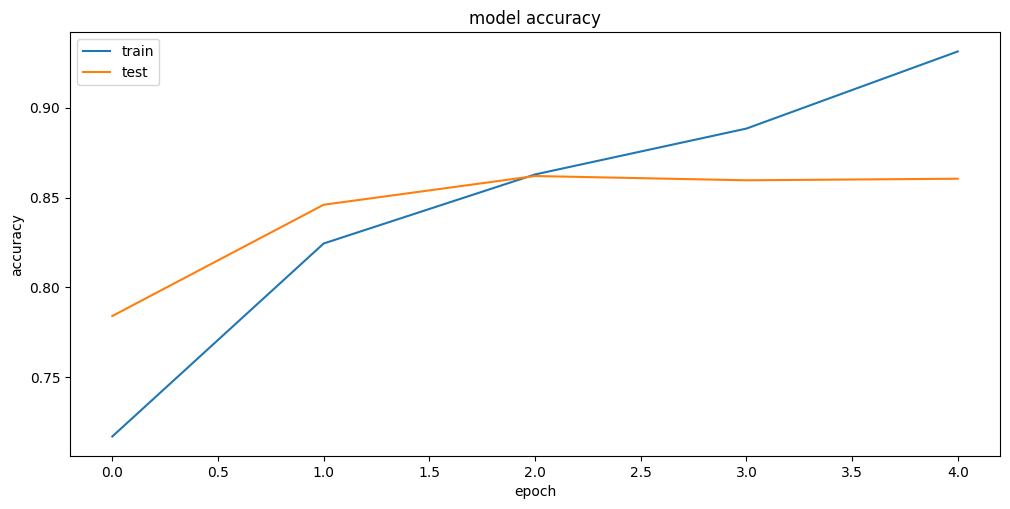

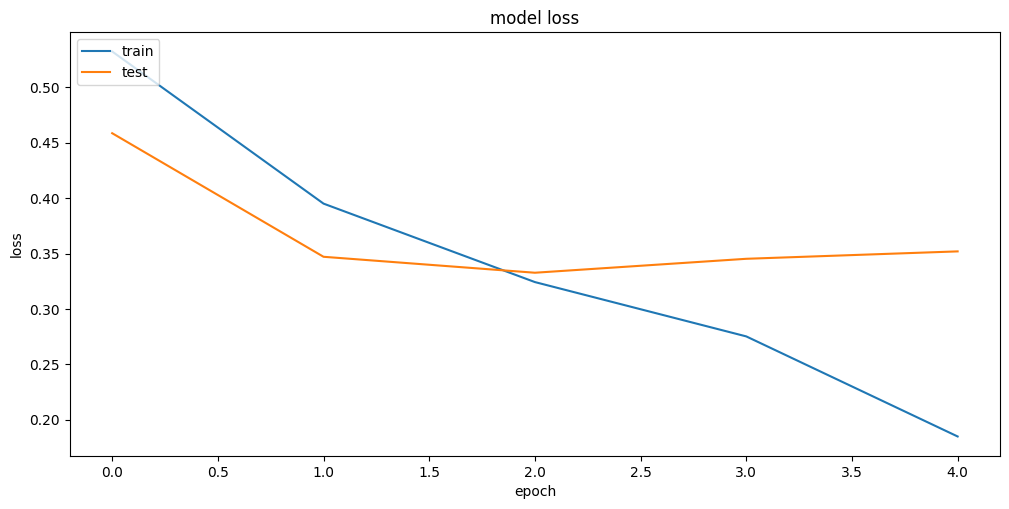

In [210]:
# Model Performance Charts

import matplotlib.pyplot as plt

plt.plot(hybrid_model_history.history['acc'])
plt.plot(hybrid_model_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(hybrid_model_history.history['loss'])
plt.plot(hybrid_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [211]:
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score, ConfusionMatrixDisplay
y_pred_proba = hybrid_model.predict(X_test)
y_pred = np.array([0 if proba < 0.5 else 1 for proba in y_pred_proba])
hnn_report=classification_report(y_test, y_pred)
print(hnn_report)

313/313 [==============================] - 16s 47ms/step
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      4961
           1       0.86      0.86      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [241]:
import tensorflow as tf
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

y_pred = tf.argmax(hybrid_model.predict(X_test), axis=-1)
y_true = tf.argmax(y_test, axis=-1)

# Obtain the predicted probabilities for each input instance
y_pred_prob = hybrid_model.predict(X_test)

# Apply a threshold to convert the probabilities to binary labels
y_pred = (y_pred_prob >= 0.5).astype(int)

# Calculate the f1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate the precision score
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate the recall score
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate the accuracy score
accuracy = round(hybrid_score[1]*100,2)


# Print the scores
print('F1 score: {:.4f}'.format(f1))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall Score: {:.2f}".format(recall))
print("Accuracy:", accuracy)

313/313 [==============================] - 18s 58ms/step
F1 score: 0.8602
Precision: 86.02%
Recall Score: 0.86
Accuracy: 86.02


In [242]:
data.append(["HYBRID", f1, precision, recall, accuracy])

<Figure size 500x500 with 0 Axes>

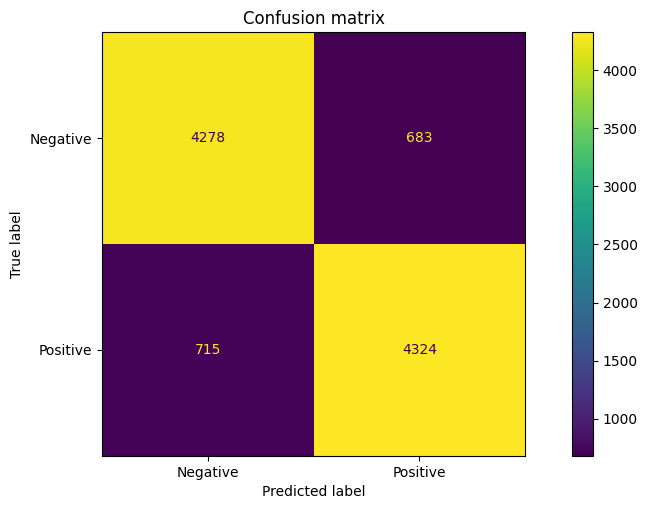

In [214]:
cm = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels = ['Negative', 'Positive'])
plt.figure(figsize = (5,5))
cm.plot()
plt.title('Confusion matrix')
plt.show()

# Saving the model

In [243]:
# Saving the model as a h5 file for possible use later

snn_model.save(f"./c1_snn_model_acc_{round(snn_score[1], 3)}.h5", save_format='h5')

In [244]:
# Saving the model as a h5 file for possible use later

cnn_model.save(f"./c1_cnn_model_acc_{round(cnn_score[1], 3)}.h5", save_format='h5')

In [245]:
# Saving the model as a h5 file for possible use later

cnnop_model.save(f"./c1_cnnop_model_acc_{round(cnnop_score[1], 3)}.h5", save_format='h5')

In [246]:
# Saving the model as a h5 file for possible use later

lstm_model.save(f"./c1_lstm_model_acc_{round(lstm_score[1], 3)}.h5", save_format='h5')

In [247]:
# Saving the model as a h5 file for possible use later

bilstm_model.save(f"./c1_bilstm_model_acc_{round(bilstm_score[1], 3)}.h5", save_format='h5')

In [248]:
# Saving the model as a h5 file for possible use later

cnn_lstm_model.save(f"./c1_cnn_lstm_model_acc_{round(cnn_lstm_score[1], 3)}.h5", save_format='h5')

In [249]:
# Saving the model as a h5 file for possible use later

cnn_bilstm_model.save(f"./c1_cnn_bilstm_model_acc_{round(cnn_bilstm_score[1], 3)}.h5", save_format='h5')

In [250]:
# Saving the model as a h5 file for possible use later

hybrid_model.save(f"./c1_hybrid_model_acc_{round(hybrid_score[1], 3)}.h5", save_format='h5')

# COMPARISION RESULTS

In [251]:
train_acc = []
val_acc = []
train_loss = []
val_loss = []

train_acc.append(snn_model_history.history['acc'])
val_acc.append(snn_model_history.history['val_acc'])
train_loss.append(snn_model_history.history['loss'])
val_loss.append(snn_model_history.history['val_loss'])

train_acc.append(cnn_model_history.history['acc'])
val_acc.append(cnn_model_history.history['val_acc'])
train_loss.append(cnn_model_history.history['loss'])
val_loss.append(cnn_model_history.history['val_loss'])

train_acc.append(cnnop_model_history.history['acc'])
val_acc.append(cnnop_model_history.history['val_acc'])
train_loss.append(cnnop_model_history.history['loss'])
val_loss.append(cnnop_model_history.history['val_loss'])

train_acc.append(lstm_model_history.history['acc'])
val_acc.append(lstm_model_history.history['val_acc'])
train_loss.append(lstm_model_history.history['loss'])
val_loss.append(lstm_model_history.history['val_loss'])

train_acc.append(bilstm_model_history.history['acc'])
val_acc.append(bilstm_model_history.history['val_acc'])
train_loss.append(bilstm_model_history.history['loss'])
val_loss.append(bilstm_model_history.history['val_loss'])

train_acc.append(cnn_lstm_model_history.history['acc'])
val_acc.append(cnn_lstm_model_history.history['val_acc'])
train_loss.append(cnn_lstm_model_history.history['loss'])
val_loss.append(cnn_lstm_model_history.history['val_loss'])

train_acc.append(cnn_bilstm_model_history.history['acc'])
val_acc.append(cnn_bilstm_model_history.history['val_acc'])
train_loss.append(cnn_bilstm_model_history.history['loss'])
val_loss.append(cnn_bilstm_model_history.history['val_loss'])

train_acc.append(hybrid_model_history.history['acc'])
val_acc.append(hybrid_model_history.history['val_acc'])
train_loss.append(hybrid_model_history.history['loss'])
val_loss.append(hybrid_model_history.history['val_loss'])

In [252]:
import pandas as pd
models=["SNN","CNN","CNN-OP","LSTM","BI-LSTM","CNN-LSTM","CNN-BILSTM","HYBRID"]
accuracy = []
accuracy.append(round(snn_score[1]*100,2))
accuracy.append(round(cnn_score[1]*100,2))
accuracy.append(round(cnnop_score[1]*100,2))
accuracy.append(round(lstm_score[1]*100,2))
accuracy.append(round(bilstm_score[1]*100,2))
accuracy.append(round(cnn_lstm_score[1]*100,2))
accuracy.append(round(cnn_bilstm_score[1]*100,2))
accuracy.append(round(hybrid_score[1]*100,2))

# Sample data
accuracy = np.array(accuracy)

# Convert to percent with one decimal place
accuracy = np.round(accuracy, 1)

metrics = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy,
})

# Set Model column as index
metrics = metrics.set_index('Model')

# Display DataFrame
print(metrics)

# Print the results

            Accuracy
Model               
SNN             75.0
CNN             83.8
CNN-OP          84.4
LSTM            85.2
BI-LSTM         85.3
CNN-LSTM        84.5
CNN-BILSTM      85.5
HYBRID          86.0


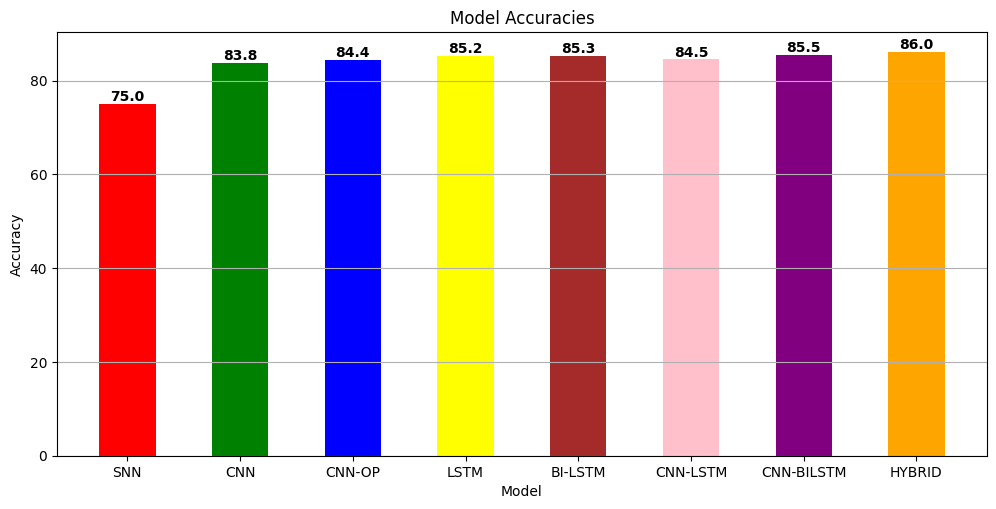

In [253]:
import matplotlib.pyplot as plt


# Create a bar chart
plt.close('all')
colors = ['red', 'green', 'blue','yellow','brown','pink','purple','orange']
plt.rcParams["figure.figsize"] = (12,5.5)
plt.bar(models, accuracy,color=colors,width=0.5)

# Add horizontal grid lines
plt.grid(True, axis='y')

# Add a title and axis labels
plt.title('Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')

# Rotate x-axis labels
# plt.xticks(rotation=45)

# Add value labels on top of each bar
for i, v in enumerate(accuracy):
    plt.text(i, v, str(v), ha='center', va='bottom', fontweight='bold')

# Display the chart
plt.show()

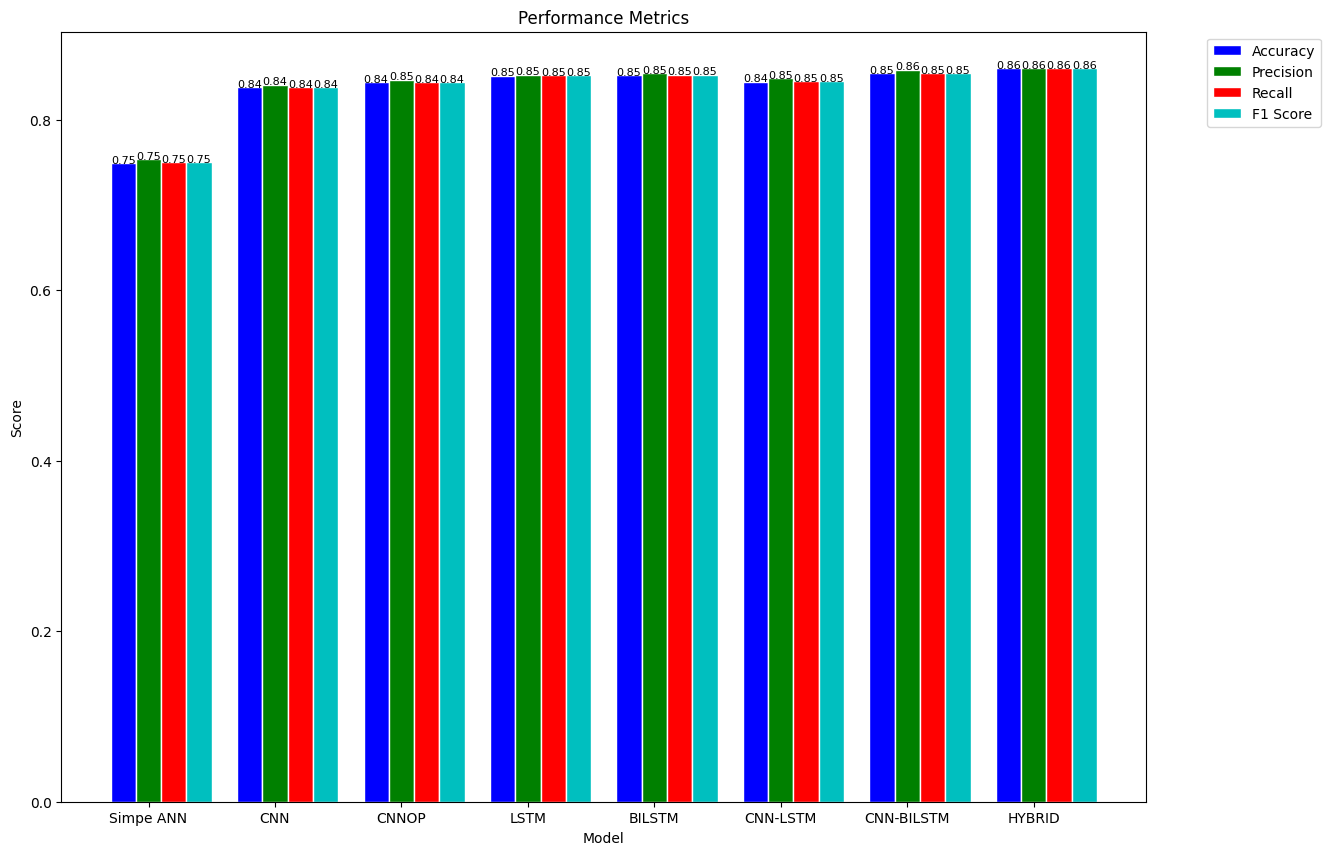

In [256]:
import numpy as np
import matplotlib.pyplot as plt

# extract the accuracy, precision, recall, and f1 values for each model
accuracy = [x[1] for x in data]
precision = [x[2] for x in data]
recall = [x[3] for x in data]
f1 = [(x[4]/100) for x in data]

# set the width of the bars
barWidth = 0.20

# set the positions of the bars on the x-axis
r1 = np.arange(len(data))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# create the bar chart
plt.subplots(figsize=(14,10))
bar1=plt.bar(r1, accuracy, color='b', width=barWidth, edgecolor='white', label='Accuracy')
bar2=plt.bar(r2, precision, color='g', width=barWidth, edgecolor='white', label='Precision')
bar3=plt.bar(r3, recall, color='r', width=barWidth, edgecolor='white', label='Recall')
bar4=plt.bar(r4, f1, color='c', width=barWidth, edgecolor='white', label='F1 Score')

# add labels and titles
plt.xlabel('Model')
plt.xticks([r + barWidth for r in range(len(data))],[x[0] for x in data])
plt.ylabel('Score')
plt.title('Performance Metrics')

# add legend
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# add text labels above each bar
for i in range(len(data)):
    plt.text(r1[i],accuracy[i], '{:.2f}'.format(accuracy[i]), fontsize=8,ha='center')
    plt.text(r2[i],precision[i], '{:.2f}'.format(precision[i]), fontsize=8,ha='center')
    plt.text(r3[i],recall[i], '{:.2f}'.format(recall[i]), fontsize=8,ha='center')
    plt.text(r4[i],f1[i], '{:.2f}'.format(f1[i]), fontsize=8,ha='center')

# show the plot
plt.show()


# GRAPH COMPARISION

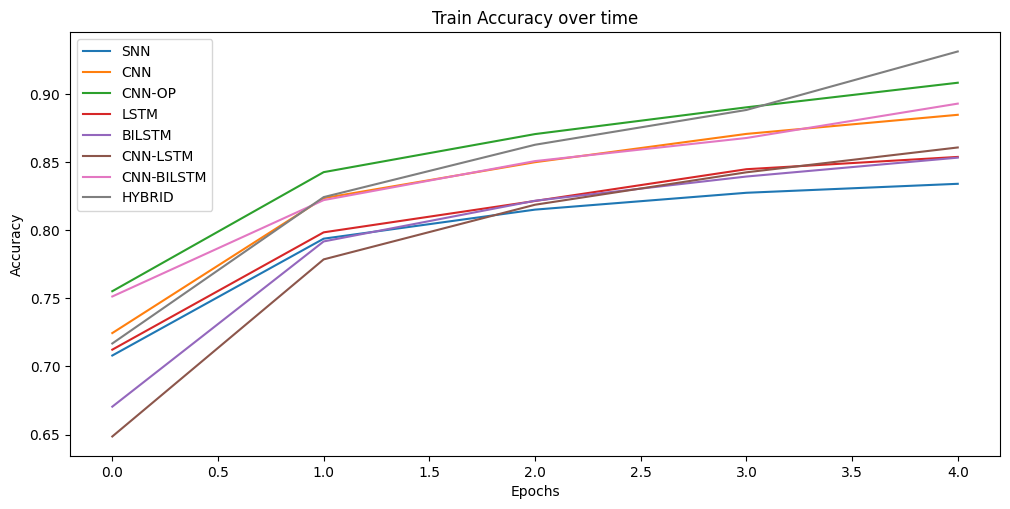

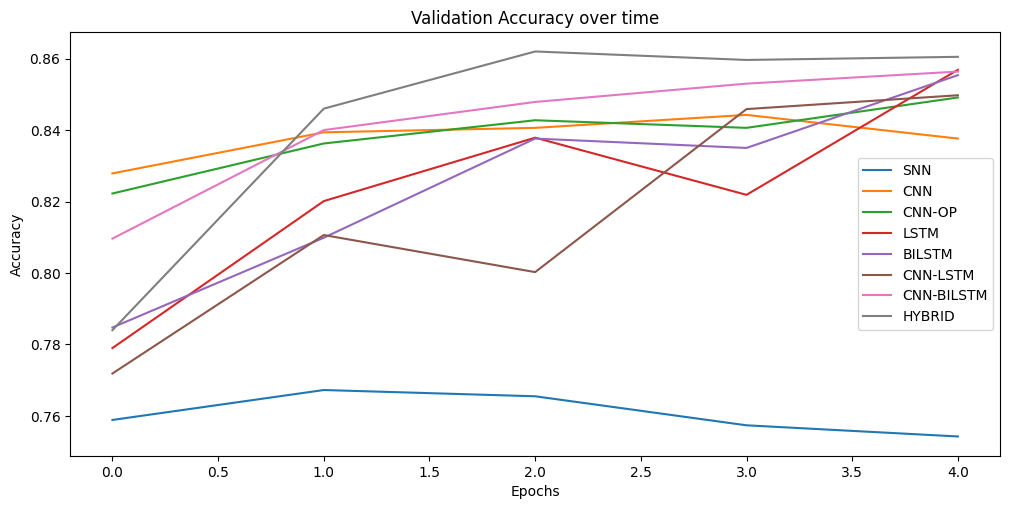

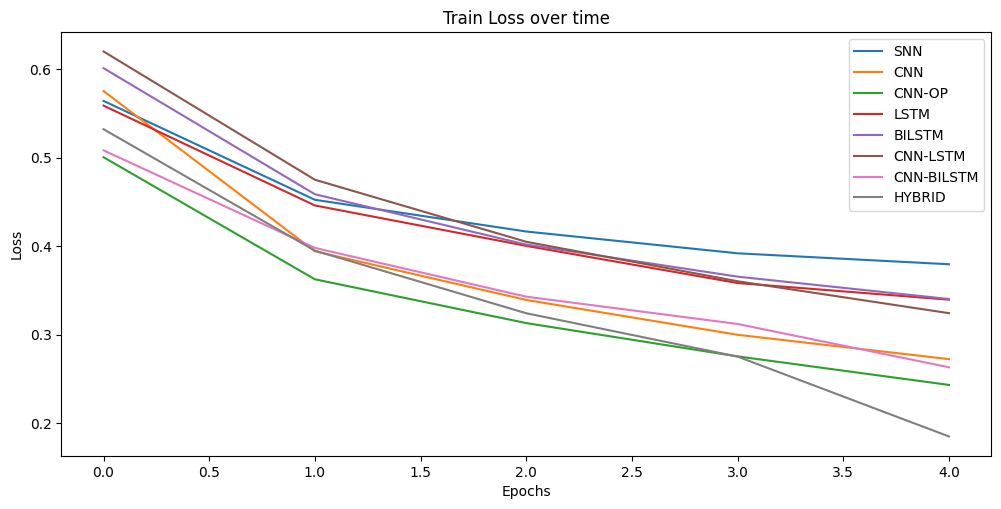

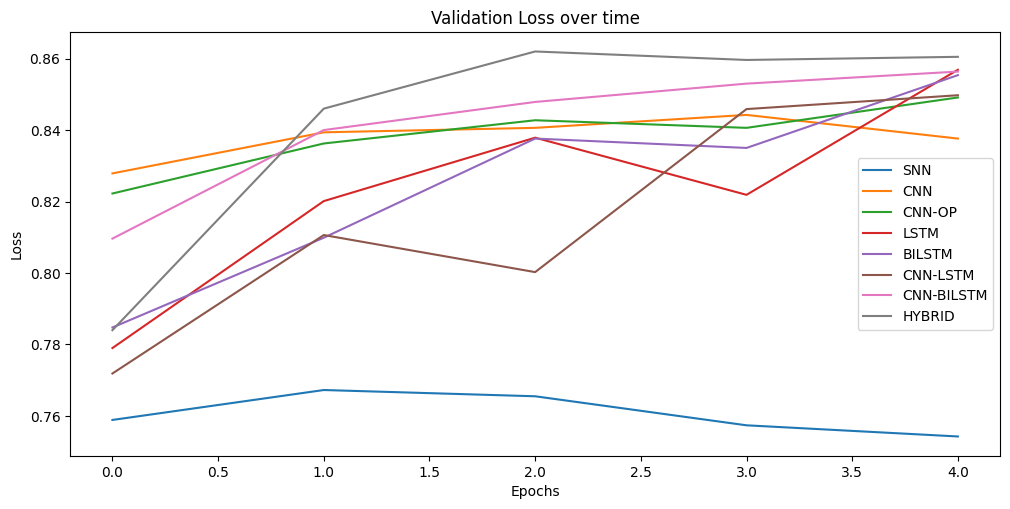

In [257]:
import sys
plt.close('all')

# Create the plot for train accuracy
x = range(len(train_acc[0]))
# print(x)
# sys.exit()
fig1 = plt.figure()
plt.rcParams["figure.figsize"] = (12,5.5)
plt.plot(x, train_acc[0], label="SNN")
plt.plot(x, train_acc[1], label="CNN")
plt.plot(x, train_acc[2], label="CNN-OP")
plt.plot(x, train_acc[3], label="LSTM")
plt.plot(x, train_acc[4], label="BILSTM")
plt.plot(x, train_acc[5], label="CNN-LSTM")
plt.plot(x, train_acc[6], label="CNN-BILSTM")
plt.plot(x, train_acc[7], label="HYBRID")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train Accuracy over time')


# Create the plot for validation accuracy
fig2 = plt.figure()
plt.rcParams["figure.figsize"] = (12,5.5)
plt.plot(x, val_acc[0], label="SNN")
plt.plot(x, val_acc[1], label="CNN")
plt.plot(x, val_acc[2], label="CNN-OP")
plt.plot(x, val_acc[3], label="LSTM")
plt.plot(x, val_acc[4], label="BILSTM")
plt.plot(x, val_acc[5], label="CNN-LSTM")
plt.plot(x, val_acc[6], label="CNN-BILSTM")
plt.plot(x, val_acc[7], label="HYBRID")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy over time')

# Create the plot for train loss
fig3 = plt.figure()
plt.rcParams["figure.figsize"] = (12,5.5)
plt.plot(x, train_loss[0], label="SNN")
plt.plot(x, train_loss[1], label="CNN")
plt.plot(x, train_loss[2], label="CNN-OP")
plt.plot(x, train_loss[3], label="LSTM")
plt.plot(x, train_loss[4], label="BILSTM")
plt.plot(x, train_loss[5], label="CNN-LSTM")
plt.plot(x, train_loss[6], label="CNN-BILSTM")
plt.plot(x, train_loss[7], label="HYBRID")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train Loss over time')

# Create the plot for validation loss
fig4 = plt.figure()
plt.rcParams["figure.figsize"] = (12,5.5)
plt.plot(x, val_acc[0], label="SNN")
plt.plot(x, val_acc[1], label="CNN")
plt.plot(x, val_acc[2], label="CNN-OP")
plt.plot(x, val_acc[3], label="LSTM")
plt.plot(x, val_acc[4], label="BILSTM")
plt.plot(x, val_acc[5], label="CNN-LSTM")
plt.plot(x, val_acc[6], label="CNN-BILSTM")
plt.plot(x, val_acc[7], label="HYBRID")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Validation Loss over time')

# Show all the plots
plt.show()

# Making Predictions on Live IMDb data

In [33]:
# Load previously trained LSTM Model

from keras.models import load_model

model_path ='c1_hybrid_model_acc_0.864.h5'
pretrained_lstm_model = load_model(model_path)

# summarize model.
pretrained_lstm_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 100)          9239400   
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 9,356,777
Trainable params: 117,377
Non-trainable params: 9,239,400
_________________________________________________________________


In [34]:
import chardet
file = 'a3_IMDb_Unseen_Reviews.csv'
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
file_type = result['encoding']

In [35]:
# Load sample IMDb reviews csv, having ~6 movie reviews, along with their IMDb rating
if (file_type == 'UTF-8-SIG'):
    sample_reviews = pd.read_csv(file)
    print(sample_reviews.head(8))
else:
    print("CSV file not of encoding: UTF-8-SIG type")
    exit()

   Unnamed: 0       Movie                                        Review Text  \
0           0  Ex Machina  Intelligent Movie.\r\nThis movie is obviously ...   
1           1  Ex Machina  Extraordinary and thought-provoking.\r\n'Ex ma...   
2           2  Ex Machina  Poor story, only reasonable otherwise.\r\nIf I...   
3           3  Ex Machina  Had Great Potential.\r\nThis movie is one of t...   
4           4    Eternals  Amazing visuals and philosophical concepts!\r\...   
5           5    Eternals  Worst MCU film ever\r\n\r\nFollowing the event...   
6           6     Pathaan                         मुझे यह फिल्म बेहद पसंद आई   
7           7     Pathaan                                        film génial   

   IMDb Rating  
0          8.8  
1          9.5  
2          4.3  
3          8.2  
4          8.5  
5          0.2  
6          6.5  
7          9.5  


In [36]:
# Preprocess review text with earlier defined preprocess_text function

unseen_reviews = sample_reviews['Review Text']

unseen_processed = []
for review in unseen_reviews:
    review = convert.conversion(review)
    review = clean_text(review)
    unseen_processed.append(review)

In [37]:
unseen_processed

['intelligent movie movie obviously allegorical fascinate tale ai mainly manipulation power want action spectacular chi movie aim people like think rather passively wait entertain theme ai also surveillance excellent point data us collect phone company search engine company commercial operate systems makers plot seem simple extremely clever protagonist play game try stay one step ahead one another movie perfectly consistent internal logic play perfectly go expect much however see people satisfy movie set brilliantly therefore give least recent moves get movie succeed another recent movie ai transcendence think call fail interest failure third movie ai spanish movie call eva also brilliant eva move movie philosophical moves perfect different ways ai name movie va seem nod title spanish movie aside nice star appear ex machine eva cast great course several aspects movie realistic often absurd allegorical movie acceptable movie make point rather strive realism fairytale accurate portray ',

In [38]:
from keras_preprocessing.text import tokenizer_from_json

In [39]:
# Loading
with open('b3_tokenizer.json') as f:
    data = json.load(f)
    loaded_tokenizer = tokenizer_from_json(data)

In [40]:
# Tokenising instance with earlier trained tokeniser
unseen_tokenized = loaded_tokenizer.texts_to_sequences(unseen_processed)

In [41]:
unseen_tokenized

[[925,
  1,
  1,
  400,
  14420,
  22895,
  627,
  14035,
  1266,
  7357,
  511,
  79,
  97,
  1863,
  13760,
  1,
  4657,
  16,
  4,
  25,
  140,
  20211,
  716,
  2605,
  617,
  14035,
  18,
  12177,
  199,
  109,
  9047,
  76,
  6133,
  1378,
  893,
  1464,
  6932,
  893,
  2013,
  8439,
  7741,
  1034,
  33,
  195,
  463,
  435,
  879,
  1740,
  179,
  327,
  232,
  626,
  3,
  1434,
  1291,
  3,
  62,
  1,
  806,
  4114,
  5415,
  1989,
  179,
  806,
  51,
  387,
  13,
  88,
  11,
  16,
  4786,
  1,
  153,
  1958,
  1398,
  93,
  113,
  1014,
  970,
  15,
  1,
  2989,
  62,
  1014,
  1,
  14035,
  25602,
  25,
  522,
  1770,
  475,
  1852,
  736,
  1,
  14035,
  1776,
  1,
  522,
  3822,
  18,
  383,
  3822,
  682,
  1,
  4051,
  970,
  284,
  164,
  624,
  14035,
  261,
  1,
  23361,
  195,
  5440,
  294,
  1776,
  1,
  1011,
  213,
  204,
  817,
  1040,
  1362,
  3822,
  75,
  17,
  151,
  312,
  1264,
  1,
  638,
  285,
  1602,
  14420,
  1,
  3172,
  1,
  21,
  109,
  140,
  1

In [42]:
# Pooling instance to have maxlength of 100 tokens
unseen_padded = pad_sequences(unseen_tokenized, padding='post', maxlen=100)

In [43]:
unseen_padded

array([[  879,  1740,   179,   327,   232,   626,     3,  1434,  1291,
            3,    62,     1,   806,  4114,  5415,  1989,   179,   806,
           51,   387,    13,    88,    11,    16,  4786,     1,   153,
         1958,  1398,    93,   113,  1014,   970,    15,     1,  2989,
           62,  1014,     1, 14035, 25602,    25,   522,  1770,   475,
         1852,   736,     1, 14035,  1776,     1,   522,  3822,    18,
          383,  3822,   682,     1,  4051,   970,   284,   164,   624,
        14035,   261,     1, 23361,   195,  5440,   294,  1776,     1,
         1011,   213,   204,   817,  1040,  1362,  3822,    75,    17,
          151,   312,  1264,     1,   638,   285,  1602, 14420,     1,
         3172,     1,    21,   109,   140, 12474,  1645, 10209,  1615,
         1916],
       [  769,   220,    41,  3895,   234,   352,  8205,  6752,   630,
           21,  6507,    72,  1400,  2885, 24074, 10547,  3633,  1645,
           25, 11701,   836, 19425,    28,   747,  1574,  114

In [44]:
# Passing tokenised instance to the LSTM model for predictions
unseen_sentiments = pretrained_lstm_model.predict(unseen_padded)

unseen_sentiments

1/1 [==============================] - 1s 507ms/step


array([[0.89489514],
       [0.97426885],
       [0.42887476],
       [0.81114876],
       [0.8445209 ],
       [0.03404821],
       [0.65234333],
       [0.9646651 ]], dtype=float32)

In [45]:
# Writing model output file back to Google Drive

sample_reviews['Predicted Sentiments'] = np.round(unseen_sentiments*10,1)

df_prediction_sentiments = pd.DataFrame(sample_reviews['Predicted Sentiments'], columns = ['Predicted Sentiments'])
df_movie                 = pd.DataFrame(sample_reviews['Movie'], columns = ['Movie'])
df_review_text           = pd.DataFrame(sample_reviews['Review Text'], columns = ['Review Text'])
df_imdb_rating           = pd.DataFrame(sample_reviews['IMDb Rating'], columns = ['IMDb Rating'])
df_prediction_sentimenta = pd.DataFrame(sample_reviews['Predicted Sentiments'], columns = ['Sampleentiments'])

dfx=pd.concat([df_movie, df_review_text, df_imdb_rating, df_prediction_sentiments], axis=1)

dfx.to_csv("c2_IMDb_Unseen_Predictions.csv", sep=',', encoding = 'UTF-8-SIG')

dfx.head(8)

,Movie,Review Text,IMDb Rating,Predicted Sentiments
0,Ex Machina,Intelligent Movie.\r\nThis movie is obviously ...,8.8,8.9
1,Ex Machina,Extraordinary and thought-provoking.\r\n'Ex ma...,9.5,9.7
2,Ex Machina,"Poor story, only reasonable otherwise.\r\nIf I...",4.3,4.3
3,Ex Machina,Had Great Potential.\r\nThis movie is one of t...,8.2,8.1
4,Eternals,Amazing visuals and philosophical concepts!\r\...,8.5,8.4
5,Eternals,Worst MCU film ever\r\n\r\nFollowing the event...,0.2,0.3
6,Pathaan,मुझे यह फिल्म बेहद पसंद आई,6.5,6.5
7,Pathaan,film génial,9.5,9.6


In [46]:
unseen_sentiments

array([[0.89489514],
       [0.97426885],
       [0.42887476],
       [0.81114876],
       [0.8445209 ],
       [0.03404821],
       [0.65234333],
       [0.9646651 ]], dtype=float32)

In [47]:
unseen_sentiments[0][0]

0.89489514

In [48]:
prediction_text= f"Positive Review with probable IMDb rating as: {np.round(unseen_sentiments[0][0]*10,1)}"

In [49]:
prediction_text

'Positive Review with probable IMDb rating as: 8.9'